# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
#Import warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
# read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Datasets_Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_sample_data = pd.DataFrame()
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour
            # Iterate through each hour of the selected date
        for date in monthly_data['date'].unique():
          df_date = monthly_data[monthly_data['date'] == date]
          for hour in range(24):
            df_hour = df_date[df_date['hour'] == hour]
                # Sample 5% of the hourly data randomly
            if not df_hour.empty:
              monthly_sample_data = df_hour.sample(frac = 0.007, random_state = 42)
                # add data of this hour to the dataframe
              sampled_data = pd.concat([sampled_data, monthly_sample_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data],ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [36]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/Datasets_Dictionary/sample_data_combined_12months.csv')

In [37]:
df.head()
df['date'].unique()

array([datetime.date(2023, 9, 1), datetime.date(2023, 9, 2),
       datetime.date(2023, 9, 3), datetime.date(2023, 9, 4),
       datetime.date(2023, 9, 5), datetime.date(2023, 9, 6),
       datetime.date(2023, 9, 7), datetime.date(2023, 9, 8),
       datetime.date(2023, 9, 9), datetime.date(2023, 9, 10),
       datetime.date(2023, 9, 11), datetime.date(2023, 9, 12),
       datetime.date(2023, 9, 13), datetime.date(2023, 9, 14),
       datetime.date(2023, 9, 15), datetime.date(2023, 9, 16),
       datetime.date(2023, 9, 17), datetime.date(2023, 9, 18),
       datetime.date(2023, 9, 19), datetime.date(2023, 9, 20),
       datetime.date(2023, 9, 21), datetime.date(2023, 9, 22),
       datetime.date(2023, 9, 23), datetime.date(2023, 9, 24),
       datetime.date(2023, 9, 25), datetime.date(2023, 9, 26),
       datetime.date(2023, 9, 27), datetime.date(2023, 9, 28),
       datetime.date(2023, 9, 29), datetime.date(2023, 9, 30),
       datetime.date(2023, 2, 1), datetime.date(2023, 2, 2),
   

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [38]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Datasets_Dictionary/sample_data_combined_12months.csv')


In [10]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1           1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2           2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3           3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4           4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           4.71         NaN                NaN   
1              2.0           0.56         1.0                  N   
2              2.0          18.46         2.0                  N   
3              2.0          13.71         1.0                  N   
4              1.0           0.71         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           113           238  ...      0.5        4.32          0.00   
1           142           142  ...      0.5        0.00          0.00   
2           132           163  ...      0.5       15.71          6.94   
3           249           180  ...      0.5        0.00          0.00   
4           144           232  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour  airport_fee  
0  2023-09-01     0          NaN  
1  2023-09-01     0          NaN  
2  2023-09-01     0          NaN  
3  2023-09-01     0          NaN  
4  2023-09-01     0          NaN  

[5 rows x 23 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  date                   object 
 21  hour                   int64  
 22  airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [39]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True)


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                0         2  2023-09-01 00:39:59   2023-09-01 01:00:28   
1                1         2  2023-09-01 00:24:50   2023-09-01 00:27:19   
2                2         2  2023-09-01 00:19:27   2023-09-01 01:04:02   
3                3         2  2023-09-01 00:42:13   2023-09-01 01:20:20   
4                4         2  2023-09-01 00:11:38   2023-09-01 00:17:56   
...            ...       ...                  ...                   ...   
265482      265482         2  2023-11-30 23:32:06   2023-11-30 23:36:20   
265483      265483         2  2023-11-30 23:15:22   2023-11-30 23:43:31   
265484      265484         2  2023-11-30 23:30:10   2023-11-30 23:53:57   
265485      265485         2  2023-11-30 23:36:36   2023-11-30 23:42:17   
265486      265486         2  2023-11-30 23:44:31   2023-12-01 00:02:25   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   NaN           4.71         NaN                NaN   
1                   2.0           0.56         1.0                  N   
2                   2.0          18.46         2.0                  N   
3                   2.0          13.71         1.0                  N   
4                   1.0           0.71         1.0                  N   
...                 ...            ...         ...                ...   
265482              1.0           0.80         1.0                  N   
265483              3.0           9.89         1.0                  N   
265484              1.0           4.90         1.0                  N   
265485              NaN           0.86         NaN                NaN   
265486              1.0           2.20         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0                113           238  ...      0.5        4.32          0.00   
1                142           142  ...      0.5        0.00          0.00   
2                132           163  ...      0.5       15.71          6.94   
3                249           180  ...      0.5        0.00          0.00   
4                144           232  ...      0.5        2.00          0.00   
...              ...           ...  ...      ...         ...           ...   
265482           263           237  ...      0.5        1.08          0.00   
265483           230           223  ...      0.5       10.97          6.94   
265484           186            65  ...      0.5        5.58          0.00   
265485           232            79  ...      0.5        0.00          0.00   
265486            48           141  ...      0.5        5.50          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         33.15                   NaN   
1                         1.0         10.10                   2.5   
2                         1.0         98.40                   2.5   
3                         1.0         64.70                   2.5   
4                         1.0         14.90                   2.5   
...                       ...           ...                   ...   
265482                    1.0         11.88                   2.5   
265483                    1.0         65.81                   2.5   
265484                    1.0         36.68                   2.5   
265485                    1.0         12.08                   NaN   
265486                    1.0         27.50                   2.5   

        Airport_fee        date  hour  airport_fee  
0               NaN  2023-09-01     0          NaN  
1              0.00  2023-09-01     0          NaN  
2              1.75  2023-09-01     0          NaN  
3              0.00  2023-09-01     0          NaN  
4              0.00  2023-09-01     0          NaN  
...             ...         ...   ...          ...  
265482         0.00  2023-11-30    23          NaN  
265483         0.00  2023-11-30    23   

In [40]:
df.drop('Unnamed: 0', axis=1, inplace = True) # dropped the column 'Unnamed' i.e not needed

In [41]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             0  ...      0.5        4.32          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5       15.71          6.94   
3             4  ...      0.5        0.00          0.00   
4             1  ...      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.15                   NaN          NaN   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         98.40                   2.5         1.75   
3                    1.0         64.70                   2.5         0.00   
4                    1.0         14.90                   2.5         0.00   

         date  hour airport_fee  
0  2023-09-01     0         NaN  
1  2023-09-01     0         NaN  
2  2023-09-01     0         NaN  
3  2023-09-01     0         NaN  
4  2023-09-01     0         NaN  

[5 rows x 22 columns]

In [42]:
df.shape

(265487, 22)

In [43]:
#droping date and hour columns because they were created during sampling
df.drop('date',axis=1,inplace=True)
df.drop('hour',axis=1,inplace=True)

In [ ]:
#df.drop('store_and_fwd_flag',axis=1,inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [44]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.75])

In [45]:
df['airport_fee'].unique()

array([ nan, 1.25, 0.  ])

In [46]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee']) # Combining the values: filling the missing values (NaN) in the column 'Airport_fee' using values from other column 'airport_fee', row by row.


In [47]:
df['Airport_fee'].unique()

array([  nan,  0.  ,  1.75,  1.25, -1.75])

In [48]:
# checking the number of missing values still exists in the combined column 'Airport_fee'
print(df['Airport_fee'].isna().sum())

8831


In [49]:
df.drop('airport_fee',axis=1,inplace=True) # dropping off redundant column 'airport_fee"

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               265487 non-null  int64  
 1   tpep_pickup_datetime   265487 non-null  object 
 2   tpep_dropoff_datetime  265487 non-null  object 
 3   passenger_count        256656 non-null  float64
 4   trip_distance          265487 non-null  float64
 5   RatecodeID             256656 non-null  float64
 6   store_and_fwd_flag     256656 non-null  object 
 7   PULocationID           265487 non-null  int64  
 8   DOLocationID           265487 non-null  int64  
 9   payment_type           265487 non-null  int64  
 10  fare_amount            265487 non-null  float64
 11  extra                  265487 non-null  float64
 12  mta_tax                265487 non-null  float64
 13  tip_amount             265487 non-null  float64
 14  tolls_amount           265487 non-nu

In [51]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         NaN                NaN           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             0        24.83    0.0      0.5        4.32          0.00   
1             2         5.10    1.0      0.5        0.00          0.00   
2             1        70.00    0.0      0.5       15.71          6.94   
3             4        59.70    1.0      0.5        0.00          0.00   
4             1         7.90    1.0      0.5        2.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         33.15                   NaN          NaN  
1                    1.0         10.10                   2.5         0.00  
2                    1.0         98.40                   2.5         1.75  
3                    1.0         64.70                   2.5         0.00  
4                    1.0         14.90                   2.5         0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [52]:
# check where values of fare amount are negative
numberof_cols = df.select_dtypes(include='number').columns
print(numberof_cols)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


In [53]:
Cols_with_fares = ["fare_amount", "extra" , "mta_tax", "tip_amount",  "tolls_amount", 'improvement_surcharge', "total_amount",  "congestion_surcharge", "Airport_fee"]

In [54]:
#checking with negative values in columns
negative_values = df[Cols_with_fares] < 0
negative_fares = df[negative_values.any(axis=1)]  # Printing rows with any negative values
negative_fares

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
45589          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
65533          2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
130445         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
142925         2  2023-05-19 14:53:56   2023-05-19 14:54:03              1.0   
172973         2  2023-10-27 14:51:03   2023-10-27 14:51:11              1.0   
195374         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
199393         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
221502         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
223883         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
244556         2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
247162         2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
260654         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
45589            3.61         1.0                  N            68   
65533            0.00         1.0                  N           231   
130445           8.35         1.0                  N           132   
142925           0.00         1.0                  N           193   
172973           0.00         1.0                  N           265   
195374           1.09         2.0                  N            90   
199393           1.38         2.0                  N           249   
221502           0.02         1.0                  N           161   
223883           0.01         2.0                  N           237   
244556           0.21         2.0                  N           246   
247162           0.48         1.0                  N            75   
260654           0.05         2.0                  N           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
45589            232             2          0.0    0.0     -0.5         0.0   
65533            231             2          0.0    0.0     -0.5         0.0   
130445           222             2          0.0    0.0     -0.5         0.0   
142925           193             2          0.0    0.0     -0.5         0.0   
172973           265             2          3.0   -2.5      0.0         0.0   
195374           170             2          0.0    0.0     -0.5         0.0   
199393           186             2          0.0    0.0     -0.5         0.0   
221502           161             2          0.0    0.0     -0.5         0.0   
223883           237             2          0.0    0.0     -0.5         0.0   
244556           246             2          0.0    0.0     -0.5         0.0   
247162            75             2          0.0    0.0     -0.5         0.0   
260654           132             4          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
45589            0.0                   -1.0         -4.00   
65533            0.0                   -1.0         -1.50   
130445           0.0                   -1.0         -3.25   
142925           0.0                   -1.0         -1.50   
172973           0.0                    1.0          4.00   
195374           0.0                   -1.0         -4.00   
199393           0.0                   -1.0         -4.00   
221502           0.0                   -1.0         -4.00   
223883           0.0                   -1.0         -4.00   
244556           0.0                   -1.0         -4.00   
247162           0.0                   -1.0         -1.50   
260654           0.0                   -1.0         -3.25   

        congestion_surcharge  Airport_fee  
45589                   -2.5         0.00  
65533                    0.0         0.00  
130445                   0.0        -1.75  
142925                   0.0         0.00  
172973        

In [55]:
negative_fares.shape

(12, 19)

Did you notice something different in the `RatecodeID` column for above records?

In [56]:
#checking the unique values for 'RatecodeID' for next task
df['RatecodeID'].unique()

array([nan,  1.,  2.,  4., 99.,  5.,  3.])

In [57]:
# Analyse RatecodeID for the negative fare amounts

negative_fares["RatecodeID"].value_counts() #to summarize the count of negative fare amounts associated with each RatecodeID

# 58% of negative fares are under RateCode 1.0 and rest with 2.0

RatecodeID
1.0    7
2.0    5
Name: count, dtype: int64

In [58]:
# Finding out which columns have negative values
negtiv_values = (df[Cols_with_fares] < 0).sum()
print(negtiv_values[negtiv_values > 0])

extra                     1
mta_tax                  11
improvement_surcharge    11
total_amount             11
congestion_surcharge      6
Airport_fee               2
dtype: int64


In [59]:
# fix these negative values
df[Cols_with_fares] = df [Cols_with_fares].abs()

In [60]:
negtiv_values = (df[Cols_with_fares] < 0).sum()  # converted into int
print(negtiv_values[negtiv_values > 0])

Series([], dtype: int64)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [61]:
# Find the proportion of missing values in each column
null_value_counts= df.isnull().sum()
null_value_counts[null_value_counts>0]    #So here we can see each column has 8831 missing values


passenger_count         8831
RatecodeID              8831
store_and_fwd_flag      8831
congestion_surcharge    8831
Airport_fee             8831
dtype: int64

In [62]:
Missing_proportion = (df.isnull().sum() / len(df)) * 100
print(Missing_proportion)

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.32634
trip_distance            0.00000
RatecodeID               3.32634
store_and_fwd_flag       3.32634
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.32634
Airport_fee              3.32634
dtype: float64


In [63]:
Missing_values = null_value_counts / len(df)
print(Missing_values[Missing_values > 0]*100)

passenger_count         3.32634
RatecodeID              3.32634
store_and_fwd_flag      3.32634
congestion_surcharge    3.32634
Airport_fee             3.32634
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [64]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
43             1  2023-09-01 05:41:17   2023-09-01 05:51:07              NaN   
72             2  2023-09-01 07:44:46   2023-09-01 07:58:24              NaN   
126            1  2023-09-01 10:09:37   2023-09-01 10:29:11              NaN   
170            2  2023-09-01 11:13:50   2023-09-01 11:40:25              NaN   
...          ...                  ...                   ...              ...   
265437         1  2023-11-30 22:34:27   2023-11-30 22:47:59              NaN   
265442         2  2023-11-30 23:02:25   2023-11-30 23:17:41              NaN   
265453         2  2023-11-30 23:37:00   2023-12-01 00:07:00              NaN   
265473         1  2023-11-30 23:57:07   2023-12-01 00:08:00              NaN   
265485         2  2023-11-30 23:36:36   2023-11-30 23:42:17              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         NaN                NaN           113   
43               0.00         NaN                NaN           143   
72               2.57         NaN                NaN           224   
126              0.00         NaN                NaN            48   
170             11.33         NaN                NaN            25   
...               ...         ...                ...           ...   
265437           2.50         NaN                NaN           114   
265442           3.06         NaN                NaN            68   
265453           7.86         NaN                NaN            48   
265473           0.00         NaN                NaN           161   
265485           0.86         NaN                NaN           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
43                75             0        14.53    0.0      0.5        0.00   
72               140             0        17.01    0.0      0.5        0.00   
126              236             0        25.00    0.0      0.5        4.35   
170              138             0        36.94    0.0      0.5        7.69   
...              ...           ...          ...    ...      ...         ...   
265437            68             0        15.60    1.0      0.5        4.12   
265442           231             0        22.85    0.0      0.5        0.00   
265453           243             0        31.27    0.0      0.5        5.00   
265473           143             0        11.79    0.0      0.5        0.00   
265485            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
43               0.0                    1.0         18.53   
72               0.0                    1.0         21.01   
126              0.0                    1.0         35.35   
170              0.0                    1.0         46.13   
...              ...                    ...           ...   
265437           0.0                    1.0         24.72   
265442           0.0                    1.0         26.85   
265453           0.0                    1.0         40.27   
265473           0.0                    1.0         15.79   
265485           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        NaN          NaN  
43                       NaN          NaN  
72                       NaN          NaN  
126                      NaN          NaN  
170                      NaN          NaN  
...                      ...          ...  
265437                   NaN          NaN  
265442                   NaN          NaN  
265453                   NaN          NaN  
265473                   NaN          NaN  
265485                   NaN          Na

In [65]:
print("passenger_count median-",df["passenger_count"].median(),"\n","passenger_count mode-",df["passenger_count"].mode()[0])

passenger_count median- 1.0 
 passenger_count mode- 1.0


In [66]:
df["passenger_count"].fillna(df["passenger_count"].mode()[0], inplace=True)

In [67]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [68]:
Zero_count = (df["passenger_count"] == 0).sum()
print(f"No of zeroes in passenger_count: {Zero_count}")

No of zeroes in passenger_count: 4070


In [69]:
df["passenger_count"].replace(0, df["passenger_count"].mode()[0], inplace=True)

In [70]:
df[df["passenger_count"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [71]:
Zero_count = (df["passenger_count"] == 0).sum()
print(f"No of zeroes in passenger_count: {Zero_count}")

No of zeroes in passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [72]:
# Fix missing values in 'RatecodeID'
df["RatecodeID"].isnull().sum()

np.int64(8831)

In [73]:
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)   #replacing the mode values with null values

In [74]:
df[df["RatecodeID"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [75]:
# handle null values in congestion_surcharge

df["congestion_surcharge"].isnull().sum()

np.int64(8831)

In [76]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].median(), inplace=True)

In [77]:
df[df["congestion_surcharge"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [78]:
# Handle any remaining missing values

df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              8831
dtype: int64

In [79]:
df["store_and_fwd_flag"].isnull().sum()

np.int64(8831)

In [80]:
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)  #replacing null with mode value

In [81]:
df[df["store_and_fwd_flag"].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [82]:
df.isnull().sum() # by this all nulls are fixed

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              8831
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [83]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  265487.000000    265487.000000  265487.000000  265487.000000   
mean        1.733475         1.370538       3.581805       1.636491   
std         0.447562         0.862992      48.595892       7.422751   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         9.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265487.000000  265487.000000  265487.000000  265487.000000   
mean      165.172668     163.952988       1.164980      19.830154   
std        64.070411      69.779730       0.506647      18.204986   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  265487.000000  265487.000000  265487.000000  265487.000000   
mean        1.587698       0.495367       3.548453       0.593724   
std         1.824916       0.047990       4.046095       2.178536   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          265487.000000  265487.000000         265487.000000   
mean                0.999086      28.892121              2.314379   
std                 0.027788      22.769210              0.655438   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.020000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     911.000000              2.500000   

         Airport_fee  
count  256656.000000  
mean        0.143048  
std         0.464767  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

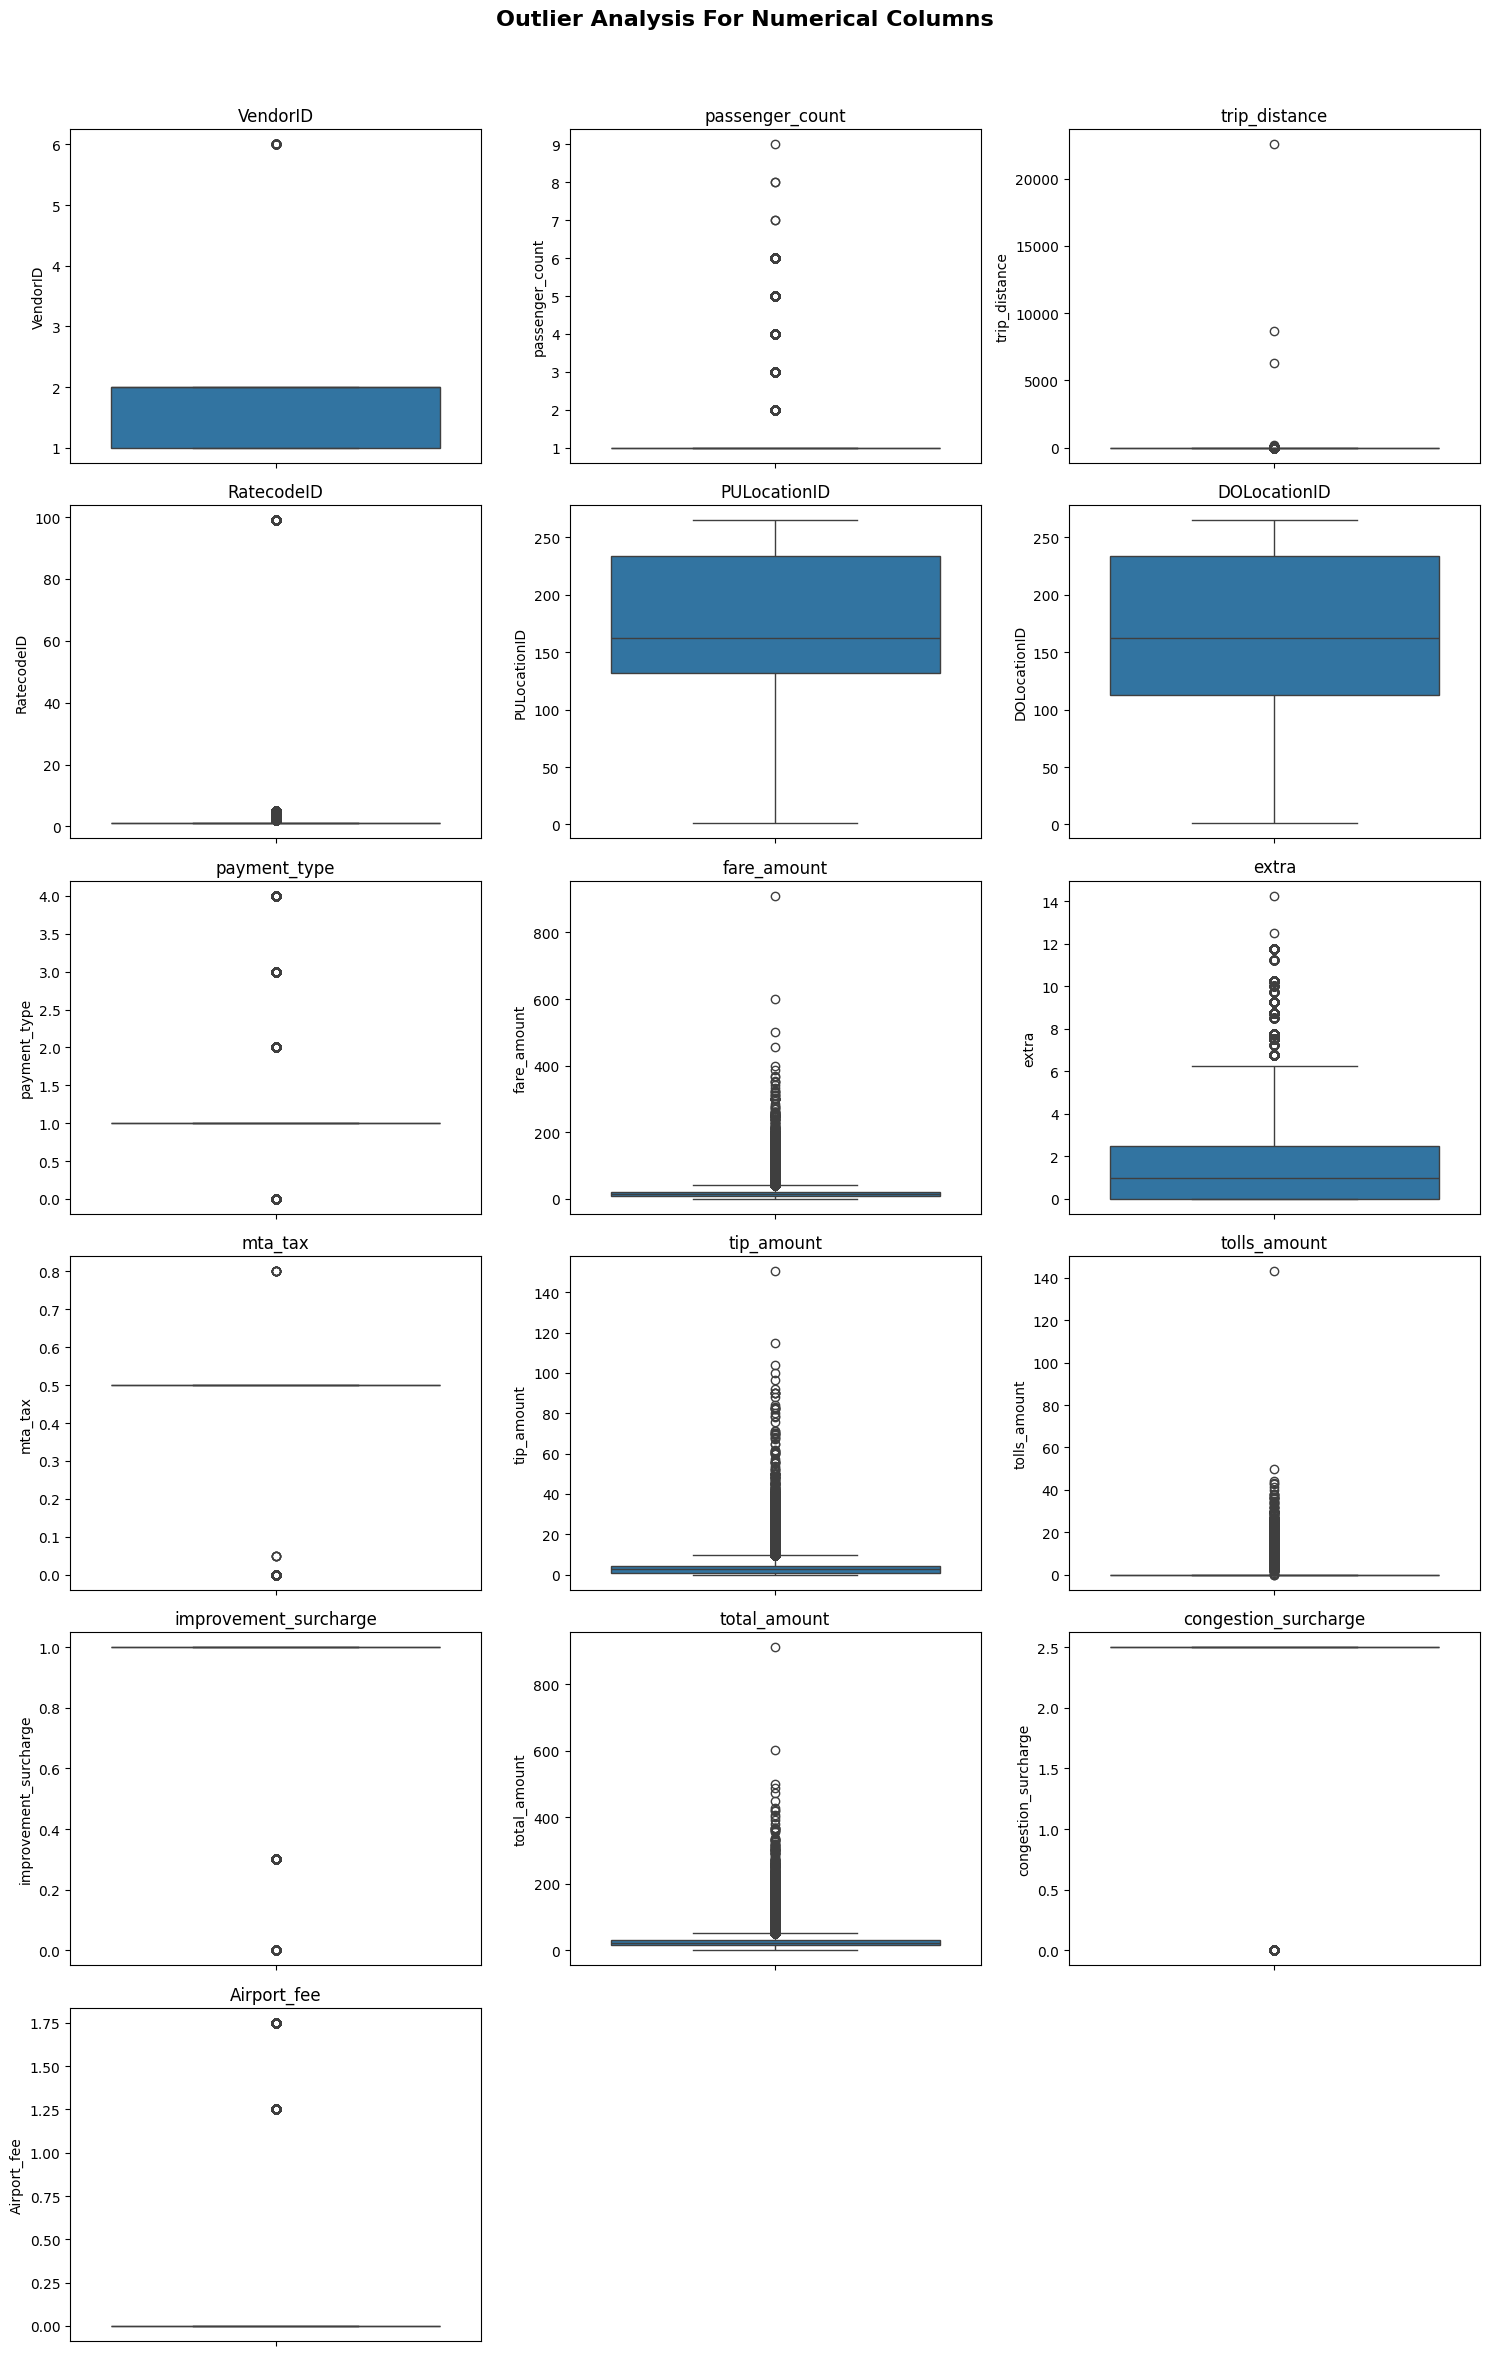

In [84]:
numeric_cols = df.select_dtypes(include=['number'])
num_cols = len(numeric_cols.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # plotting 3 graphs per 3 row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
fig.suptitle("Outlier Analysis For Numerical Columns", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols[col], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  # Removing x-labels for clarity
    axes[i].set_ylabel(col, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [85]:
(df['passenger_count'] > 6).sum()   #checking passenger count which is more than 6

np.int64(5)

In [86]:
df[df['passenger_count'] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
12804          2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   
34115          2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
48116          2  2023-04-09 09:22:54   2023-04-09 09:23:22              7.0   
150150         2  2023-05-29 02:35:04   2023-05-29 02:35:16              7.0   
264625         2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
12804           31.71         5.0                  N            48   
34115           16.79         5.0                  N           186   
48116            0.00         5.0                  N           125   
150150           0.00         5.0                  N           256   
264625           0.00         5.0                  N            90   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
12804            219             1         88.9    0.0      0.5       10.00   
34115              1             1         90.0    0.0      0.0       18.00   
48116            125             1         80.0    0.0      0.5        0.00   
150150           256             1         75.0    0.0      0.0        0.02   
264625           264             1         86.0    0.0      0.5        5.00   

        tolls_amount  improvement_surcharge  total_amount  \
12804          11.19                    1.0        114.09   
34115          14.75                    1.0        123.75   
48116          21.25                    1.0        105.25   
150150          0.00                    1.0         76.02   
264625          0.00                    1.0         92.50   

        congestion_surcharge  Airport_fee  
12804                    2.5          0.0  
34115                    0.0          0.0  
48116                    2.5          0.0  
150150                   0.0          0.0  
264625                   0.0          0.0

In [87]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [88]:
df[df['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [89]:
(df['passenger_count'] > 6).sum() #removed passenger_count which is more than 6

np.int64(0)

In [90]:
# Continue with outlier handling

df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  265482.000000    265482.000000  265482.000000  265482.000000   
mean        1.733470         1.370417       3.581690       1.636427   
std         0.447565         0.862543      48.596311       7.422807   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000   22528.820000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265482.000000  265482.000000  265482.000000  265482.000000   
mean      165.173123     163.952818       1.164983      19.828946   
std        64.070142      69.779049       0.506651      18.203012   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     910.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  265482.000000  265482.000000  265482.000000  265482.000000   
mean        1.587727       0.495370       3.548395       0.593557   
std         1.824920       0.047971       4.046004       2.177917   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          265482.000000  265482.000000         265482.000000   
mean                0.999086      28.890738              2.314404   
std                 0.027788      22.767079              0.655398   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.015000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     911.000000              2.500000   

         Airport_fee  
count  256651.000000  
mean        0.143050  
std         0.464771  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [91]:
# Entries where trip_distance ≈ 0 and fare_amount > 300
print("Total entries where trip_distance ≈ 0 and fare_amount > 300:-",((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum())
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Total entries where trip_distance ≈ 0 and fare_amount > 300:- 5


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
25491          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
44195          2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
192293         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
198695         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
205286         2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
25491             0.0         5.0                  N           246   
44195             0.0         5.0                  N           265   
192293            0.0         5.0                  N           265   
198695            0.0         5.0                  N           265   
205286            0.0         5.0                  N           265   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
25491            246             4        910.0    0.0      0.0         0.0   
44195            265             2        600.0    0.0      0.0         0.0   
192293           265             2        500.0    0.0      0.0         0.0   
198695           265             1        350.0    0.0      0.0        70.2   
205286           265             2        319.0    0.0      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
25491            0.0                    1.0         911.0   
44195            0.0                    1.0         601.0   
192293           0.0                    1.0         501.0   
198695           0.0                    1.0         421.2   
205286           0.0                    1.0         320.0   

        congestion_surcharge  Airport_fee  
25491                    0.0          0.0  
44195                    0.0          0.0  
192293                   0.0          0.0  
198695                   0.0          0.0  
205286                   0.0          0.0

In [92]:
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [93]:
df[((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [94]:
# Entries where trip_distance = 0 & fare_amount =0, but pickup and dropoff locations are different
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
19822          1  2023-02-01 08:20:36   2023-02-01 08:20:36              6.0   
20143          2  2023-02-01 16:53:34   2023-02-01 16:54:13              1.0   
216099         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
219681         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
19822             0.0        99.0                  Y           145   
20143             0.0         1.0                  N           193   
216099            0.0         5.0                  Y           138   
219681            0.0         5.0                  N           132   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
19822            264             2          0.0   0.00      0.0         0.0   
20143              7             1          0.0   0.00      0.0         0.0   
216099           264             2          0.0   9.25      0.0         0.0   
219681           215             4          0.0   1.75      0.0         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
19822            0.0                    0.0          0.00   
20143            0.0                    0.0          0.00   
216099           0.0                    1.0         10.25   
219681           0.0                    1.0          2.75   

        congestion_surcharge  Airport_fee  
19822                    0.0         0.00  
20143                    0.0         0.00  
216099                   2.5         1.75  
219681                   0.0         1.75

In [95]:
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [96]:
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [97]:
# Entries with trip_distance > 250 miles
df[df['trip_distance'] >250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
31503          2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
34289          2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
186104         2  2023-06-13 09:59:00   2023-06-13 10:12:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
31503         8645.77         1.0                  N           238   
34289         6284.45         1.0                  N           186   
186104       22528.82         1.0                  N           116   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
31503            230             0        13.34    0.0      0.5        4.34   
34289            236             0        16.00    0.0      0.5        0.00   
186104           239             0        17.42    0.0      0.5        0.37   

        tolls_amount  improvement_surcharge  total_amount  \
31503            0.0                    1.0         21.68   
34289            0.0                    1.0         20.00   
186104           0.0                    1.0         21.79   

        congestion_surcharge  Airport_fee  
31503                    2.5          NaN  
34289                    2.5          NaN  
186104                   2.5          NaN

In [98]:
df = df[df['trip_distance'] <= 250]

In [99]:
df[df['trip_distance'] >250]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [100]:
# Entries with Payment type as 0
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
43             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
72             2  2023-09-01 07:44:46   2023-09-01 07:58:24              1.0   
126            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
170            2  2023-09-01 11:13:50   2023-09-01 11:40:25              1.0   
...          ...                  ...                   ...              ...   
265437         1  2023-11-30 22:34:27   2023-11-30 22:47:59              1.0   
265442         2  2023-11-30 23:02:25   2023-11-30 23:17:41              1.0   
265453         2  2023-11-30 23:37:00   2023-12-01 00:07:00              1.0   
265473         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   
265485         2  2023-11-30 23:36:36   2023-11-30 23:42:17              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         1.0                  N           113   
43               0.00         1.0                  N           143   
72               2.57         1.0                  N           224   
126              0.00         1.0                  N            48   
170             11.33         1.0                  N            25   
...               ...         ...                ...           ...   
265437           2.50         1.0                  N           114   
265442           3.06         1.0                  N            68   
265453           7.86         1.0                  N            48   
265473           0.00         1.0                  N           161   
265485           0.86         1.0                  N           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
43                75             0        14.53    0.0      0.5        0.00   
72               140             0        17.01    0.0      0.5        0.00   
126              236             0        25.00    0.0      0.5        4.35   
170              138             0        36.94    0.0      0.5        7.69   
...              ...           ...          ...    ...      ...         ...   
265437            68             0        15.60    1.0      0.5        4.12   
265442           231             0        22.85    0.0      0.5        0.00   
265453           243             0        31.27    0.0      0.5        5.00   
265473           143             0        11.79    0.0      0.5        0.00   
265485            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
43               0.0                    1.0         18.53   
72               0.0                    1.0         21.01   
126              0.0                    1.0         35.35   
170              0.0                    1.0         46.13   
...              ...                    ...           ...   
265437           0.0                    1.0         24.72   
265442           0.0                    1.0         26.85   
265453           0.0                    1.0         40.27   
265473           0.0                    1.0         15.79   
265485           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        2.5          NaN  
43                       2.5          NaN  
72                       2.5          NaN  
126                      2.5          NaN  
170                      2.5          NaN  
...                      ...          ...  
265437                   2.5          NaN  
265442                   2.5          NaN  
265453                   2.5          NaN  
265473                   2.5          NaN  
265485                   2.5          Na

In [101]:
df[df['payment_type'] == 0].describe()

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  8828.000000           8828.0    8828.000000      8828.0   8828.000000   
mean      1.637290              1.0       3.410812         1.0    160.543725   
std       0.613341              0.0       4.246596         0.0     71.958783   
min       1.000000              1.0       0.000000         1.0      1.000000   
25%       1.000000              1.0       0.500000         1.0    107.000000   
50%       2.000000              1.0       2.100000         1.0    161.000000   
75%       2.000000              1.0       4.420000         1.0    234.000000   
max       6.000000              1.0      34.030000         1.0    265.000000   

       DOLocationID  payment_type  fare_amount        extra      mta_tax  \
count   8828.000000        8828.0  8828.000000  8828.000000  8828.000000   
mean     155.804939           0.0    22.432875     0.170146     0.493883   
std       70.937171           0.0    14.135782     0.734992     0.054967   
min        1.000000           0.0     0.000000     0.000000     0.000000   
25%      107.000000           0.0    12.940000     0.000000     0.500000   
50%      151.000000           0.0    18.590000     0.000000     0.500000   
75%      231.000000           0.0    27.560000     0.000000     0.500000   
max      265.000000           0.0   196.820000     9.250000     0.500000   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  8828.000000   8828.000000            8828.000000   8828.000000   
mean      2.723274      0.614787               0.991334     29.693064   
std       3.415126      2.278572               0.083935     17.554282   
min       0.000000      0.000000               0.000000      0.000000   
25%       0.000000      0.000000               1.000000     18.890000   
50%       2.000000      0.000000               1.000000     24.590000   
75%       4.030000      0.000000               1.000000     34.772500   
max      40.000000     25.000000               1.000000    215.570000   

       congestion_surcharge  Airport_fee  
count                8828.0          0.0  
mean                    2.5          NaN  
std                     0.0          NaN  
min                     2.5          NaN  
25%                     2.5          NaN  
50%                     2.5          NaN  
75%                     2.5          NaN  
max                     2.5          NaN

In [102]:
# Dropping off rows where trip_distance == 0 and fare_amount == 0
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

In [103]:
df[((df['payment_type'] == 0) &(df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [104]:
df[df['payment_type'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
43             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
72             2  2023-09-01 07:44:46   2023-09-01 07:58:24              1.0   
126            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
170            2  2023-09-01 11:13:50   2023-09-01 11:40:25              1.0   
...          ...                  ...                   ...              ...   
265437         1  2023-11-30 22:34:27   2023-11-30 22:47:59              1.0   
265442         2  2023-11-30 23:02:25   2023-11-30 23:17:41              1.0   
265453         2  2023-11-30 23:37:00   2023-12-01 00:07:00              1.0   
265473         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   
265485         2  2023-11-30 23:36:36   2023-11-30 23:42:17              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                4.71         1.0                  N           113   
43               0.00         1.0                  N           143   
72               2.57         1.0                  N           224   
126              0.00         1.0                  N            48   
170             11.33         1.0                  N            25   
...               ...         ...                ...           ...   
265437           2.50         1.0                  N           114   
265442           3.06         1.0                  N            68   
265453           7.86         1.0                  N            48   
265473           0.00         1.0                  N           161   
265485           0.86         1.0                  N           232   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                238             0        24.83    0.0      0.5        4.32   
43                75             0        14.53    0.0      0.5        0.00   
72               140             0        17.01    0.0      0.5        0.00   
126              236             0        25.00    0.0      0.5        4.35   
170              138             0        36.94    0.0      0.5        7.69   
...              ...           ...          ...    ...      ...         ...   
265437            68             0        15.60    1.0      0.5        4.12   
265442           231             0        22.85    0.0      0.5        0.00   
265453           243             0        31.27    0.0      0.5        5.00   
265473           143             0        11.79    0.0      0.5        0.00   
265485            79             0         8.08    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         33.15   
43               0.0                    1.0         18.53   
72               0.0                    1.0         21.01   
126              0.0                    1.0         35.35   
170              0.0                    1.0         46.13   
...              ...                    ...           ...   
265437           0.0                    1.0         24.72   
265442           0.0                    1.0         26.85   
265453           0.0                    1.0         40.27   
265473           0.0                    1.0         15.79   
265485           0.0                    1.0         12.08   

        congestion_surcharge  Airport_fee  
0                        2.5          NaN  
43                       2.5          NaN  
72                       2.5          NaN  
126                      2.5          NaN  
170                      2.5          NaN  
...                      ...          ...  
265437                   2.5          NaN  
265442                   2.5          NaN  
265453                   2.5          NaN  
265473                   2.5          NaN  
265485                   2.5          Na

In [105]:
# Assign the most common valid payment_type into these rows
Most_common_payment_type = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]
df['payment_type'].replace(0, Most_common_payment_type, inplace=True)

In [106]:
df[df['payment_type'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [107]:
# Do any columns need standardising?

df[df['tolls_amount']>100] # Charging high toll amounts

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
56156         1  2023-04-20 18:45:45   2023-04-20 18:46:08              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
56156            0.0         1.0                  Y           265   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
56156           265             1          3.0    2.5      0.5         5.0   

       tolls_amount  improvement_surcharge  total_amount  \
56156         143.0                    1.0         155.0   

       congestion_surcharge  Airport_fee  
56156                   0.0          0.0

In [108]:
df = df[df['tolls_amount']<100]

In [109]:
df[df['tolls_amount']>100]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [110]:
df[df['RatecodeID']>6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
56             1  2023-09-01 06:39:37   2023-09-01 07:14:57              1.0   
97             1  2023-09-01 09:44:39   2023-09-01 10:13:27              1.0   
155            1  2023-09-01 11:12:06   2023-09-01 12:29:16              1.0   
345            1  2023-09-01 16:28:10   2023-09-01 16:51:45              1.0   
423            1  2023-09-01 18:17:02   2023-09-01 19:45:38              1.0   
...          ...                  ...                   ...              ...   
264763         1  2023-11-30 09:26:01   2023-11-30 10:20:06              1.0   
264776         1  2023-11-30 09:47:57   2023-11-30 10:12:30              1.0   
264818         1  2023-11-30 10:34:17   2023-11-30 11:39:31              1.0   
264873         1  2023-11-30 12:53:19   2023-11-30 13:46:10              1.0   
265041         1  2023-11-30 15:22:11   2023-11-30 16:42:13              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
56                6.1        99.0                  N            63   
97                4.3        99.0                  N            39   
155              17.4        99.0                  N            33   
345               3.7        99.0                  N            95   
423               8.0        99.0                  N            65   
...               ...         ...                ...           ...   
264763            4.3        99.0                  N           225   
264776            5.0        99.0                  N            10   
264818           17.8        99.0                  N            75   
264873            5.1        99.0                  N            49   
265041            0.0        99.0                  N           246   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
56               181             1         27.5    0.0      0.5         0.0   
97                61             1         24.5    0.0      0.5         0.0   
155               86             1         77.5    0.0      0.5         0.0   
345               63             1         26.5    0.0      0.5         0.0   
423              222             1         29.5    0.0      0.5         0.0   
...              ...           ...          ...    ...      ...         ...   
264763            76             1         24.5    0.0      0.5         0.0   
264776            95             1         26.5    0.0      0.5         0.0   
264818            39             1         58.5    0.0      0.5         0.0   
264873            77             1         23.5    0.0      0.5         0.0   
265041           130             1         40.5    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
56              0.00                    1.0         29.00   
97              0.00                    1.0         26.00   
155             0.00                    1.0         79.00   
345             0.00                    1.0         28.00   
423             0.00                    1.0         31.00   
...              ...                    ...           ...   
264763          0.00                    1.0         26.00   
264776          0.00                    1.0         28.00   
264818          6.94                    1.0         66.94   
264873          0.00                    1.0         25.00   
265041          6.94                    1.0         48.94   

        congestion_surcharge  Airport_fee  
56                       0.0          0.0  
97                       0.0          0.0  
155                      0.0          0.0  
345                      0.0          0.0  
423                      0.0          0.0  
...                      ...          ...  
264763                   0.0          0.0  
264776                   0.0          0.0  
264818                   0.0          0.0  
264873                   0.0          0.0  
265041                   0.0          0.

In [111]:
# Find the mode of RatecodeID
most_common_ratecode = df.loc[df['RatecodeID'] <= 6, 'RatecodeID'].mode()[0]

In [112]:
# Replace RatecodeID > 6 with the mode
df.loc[df['RatecodeID'] > 6, 'RatecodeID'] = most_common_ratecode

In [113]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  265435.000000    265435.000000  265435.000000  265435.000000   
mean        1.733502         1.370449       3.441201       1.071471   
std         0.447549         0.862552       4.523536       0.385084   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265435.000000  265435.000000  265435.000000  265435.000000   
mean      165.167966     163.946288       1.198120      19.822177   
std        64.069492      69.777946       0.459481      18.041084   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  265435.000000  265435.000000  265435.000000  265435.000000   
mean        1.587932       0.495435       3.548557       0.593124   
std         1.824881       0.047637       4.043428       2.160485   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000      50.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          265435.000000  265435.000000         265435.000000   
mean                0.999180      28.884330              2.314757   
std                 0.026044      22.635363              0.654824   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.050000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee  
count  256608.000000  
mean        0.143042  
std         0.464758  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [114]:
df[df['tip_amount']>100]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
112212         1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
181600         1  2023-06-07 13:58:40   2023-06-07 14:05:58              1.0   
205878         2  2023-12-08 17:40:34   2023-12-08 19:18:35              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
112212          10.30         5.0                  N           231   
181600           1.50         1.0                  N            13   
205878          54.45         4.0                  N           162   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
112212           265             1          0.0    0.0      0.0      115.00   
181600            87             1         10.0    2.5      0.5      150.29   
205878           265             1        332.7    2.5      0.5      103.84   

        tolls_amount  improvement_surcharge  total_amount  \
112212         21.75                    1.0        137.75   
181600          0.00                    1.0        164.29   
205878          6.94                    1.0        449.98   

        congestion_surcharge  Airport_fee  
112212                   0.0          0.0  
181600                   2.5          0.0  
205878                   2.5          0.0

In [115]:
df[df['fare_amount'] <= 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7134           1  2023-09-11 08:55:41   2023-09-11 08:57:14              1.0   
8707           2  2023-09-13 08:41:37   2023-09-13 08:53:16              1.0   
15092          2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
19225          1  2023-09-30 13:22:42   2023-09-30 13:33:41              1.0   
24368          1  2023-02-07 16:06:43   2023-02-07 16:08:06              1.0   
34117          1  2023-02-19 17:16:38   2023-02-19 17:16:59              1.0   
36694          1  2023-02-24 14:22:52   2023-02-24 14:26:24              1.0   
43172          1  2023-04-10 15:37:59   2023-04-10 15:40:22              1.0   
45589          2  2023-04-12 19:12:27   2023-04-12 19:37:09              1.0   
50231          1  2023-04-13 10:21:11   2023-04-13 11:35:13              1.0   
56420          1  2023-04-20 23:59:40   2023-04-21 00:52:12              1.0   
59815          1  2023-04-27 11:59:34   2023-04-27 12:56:02              1.0   
65569          1  2023-03-08 15:40:28   2023-03-08 17:05:56              1.0   
68612          1  2023-03-06 16:51:00   2023-03-06 17:00:23              1.0   
69879          1  2023-03-10 09:27:56   2023-03-10 09:54:47              3.0   
84004          1  2023-03-25 02:10:25   2023-03-25 02:10:50              1.0   
85527          1  2023-03-30 23:20:54   2023-03-30 23:21:12              1.0   
93035          1  2023-01-11 16:47:59   2023-01-11 18:09:08              1.0   
97290          1  2023-01-17 15:23:25   2023-01-17 15:46:25              1.0   
106663         2  2023-01-30 15:47:07   2023-01-30 16:11:33              1.0   
110466         1  2023-07-06 16:09:14   2023-07-06 16:25:41              1.0   
112212         1  2023-07-09 12:08:25   2023-07-09 12:39:10              3.0   
114022         1  2023-07-12 09:50:16   2023-07-12 10:24:45              1.0   
121082         2  2023-07-22 02:54:09   2023-07-22 03:13:48              1.0   
124684         1  2023-07-27 13:11:48   2023-07-27 13:12:40              1.0   
125774         2  2023-07-28 21:19:11   2023-07-28 21:25:05              1.0   
127886         2  2023-05-01 09:38:07   2023-05-01 10:20:01              1.0   
130445         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
140003         1  2023-05-16 10:07:00   2023-05-16 11:12:39              1.0   
142759         1  2023-05-19 11:16:33   2023-05-19 11:49:15              1.0   
144450         2  2023-05-21 10:20:00   2023-05-21 10:34:00              1.0   
145896         1  2023-05-23 11:03:03   2023-05-23 11:07:15              1.0   
147711         2  2023-05-25 14:33:37   2023-05-25 15:21:23              1.0   
149671         2  2023-05-28 10:58:03   2023-05-28 11:08:40              1.0   
161715         1  2023-10-12 16:42:29   2023-10-12 17:40:45              1.0   
181651         1  2023-06-07 14:55:11   2023-06-07 14:57:31              1.0   
186106         2  2023-06-13 09:22:44   2023-06-13 09:31:41              1.0   
195374         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
198615         2  2023-06-29 19:37:01   2023-06-29 19:38:36              1.0   
199393         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
202786         1  2023-12-05 09:07:28   2023-12-05 09:07:56              1.0   
221502         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
223883         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   
234121         1  2023-08-18 14:57:27   2023-08-18 14:58:10              1.0   
239208         1  2023-08-26 20:08:42   2023-08-26 20:14:44              1.0   
239999         1  2023-08-28 09:29:47   2023-08-28 09:56:44              1.0   
244556         2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
246384         2  2023-11-05 18:13:44   2023-11-05 18:14:10              1.0   
246657         2  2023-11-06 08:21:14   2023-11-06 08:26:23              1.0   
247162  

In [116]:
# Impute fare_amount == 0 for trips with trip_distance > 0
# Calculate median fare per mile
Median_fare_per_mile = df[df['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()

In [117]:
# Apply imputation
df.loc[(df['fare_amount'] == 0) & (df['trip_distance'] > 0), 'fare_amount'] = \
    df['trip_distance'].map(Median_fare_per_mile)

In [118]:
df[df['fare_amount'] <= 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [119]:
df[df['fare_amount'] >500]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [120]:
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  265435.000000    265435.000000  265435.000000  265435.000000   
mean        1.733502         1.370449       3.441201       1.071471   
std         0.447549         0.862552       4.523536       0.385084   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  265435.000000  265435.000000  265435.000000  265432.000000   
mean      165.167966     163.946288       1.198120      19.826220   
std        64.069492      69.777946       0.459481      18.041233   
min         1.000000       1.000000       1.000000       0.010000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  265435.000000  265435.000000  265435.000000  265435.000000   
mean        1.587932       0.495435       3.548557       0.593124   
std         1.824881       0.047637       4.043428       2.160485   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.840000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        14.250000       0.800000     150.290000      50.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          265435.000000  265435.000000         265435.000000   
mean                0.999180      28.884330              2.314757   
std                 0.026044      22.635363              0.654824   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.050000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee  
count  256608.000000  
mean        0.143042  
std         0.464758  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.750000

In [121]:
df.shape  #checking the row & column counts after handling outliers

(265435, 19)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [122]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

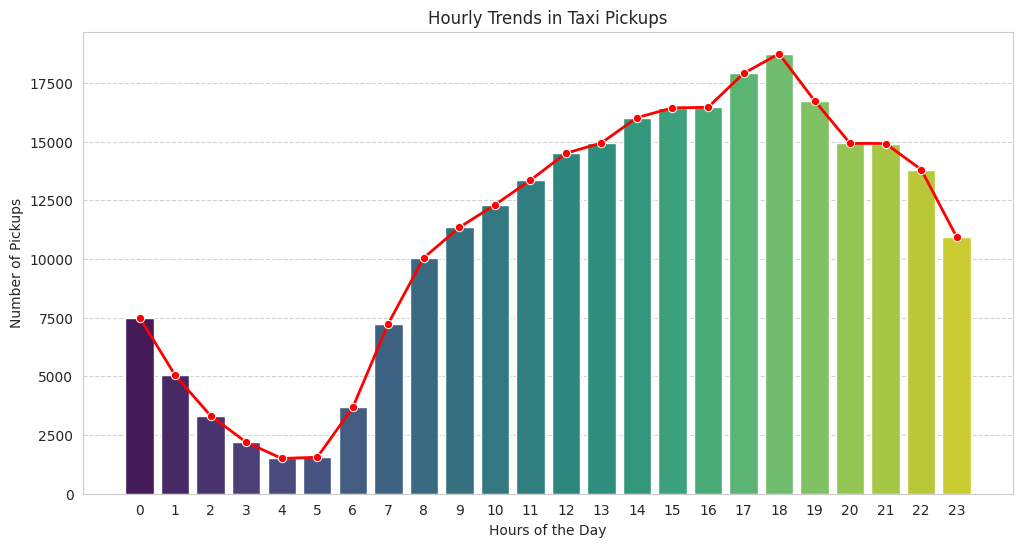

In [123]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_pickups = df.groupby("pickup_hour").size()

# Plotting the hourly trends
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='red', marker='o', linewidth=2)

# Mentioning Labels and title
plt.xlabel('Hours of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))  # Show all hours from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.9)

plt.show()


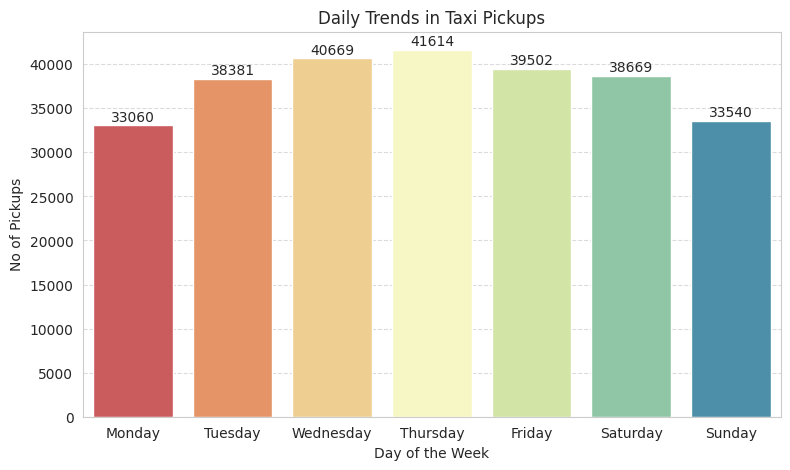

In [124]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week (0=Monday, 6=Sunday)
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

# Defining day labels
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day and count for pickups
daily_pickups = df.groupby('pickup_day').size()

# Plotting the daily trends
plt.figure(figsize=(9, 5))
sns.barplot(x=days, y=daily_pickups.values, palette="Spectral")

# Mentioning Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('No of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the values on top of bars
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)

plt.show()

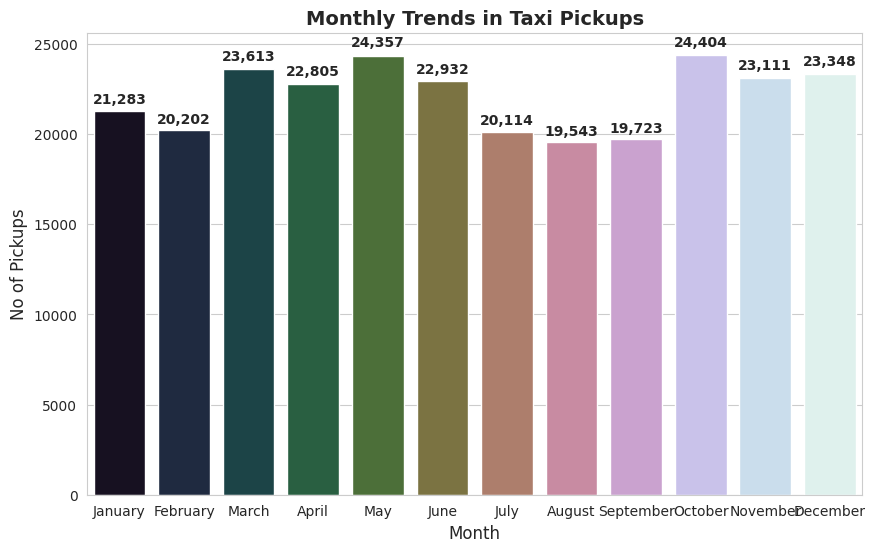

In [125]:
# Show the monthly trends in pickups

# Extract the month from datetime
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

# Count pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Plot the monthly trends
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="cubehelix")

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("No of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight='bold')

# Correct x-axis labels
plt.xticks(ticks=range(12), labels=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [127]:
# Analyse the above parameters

# List of financial columns need to check
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (df[financial_columns] == 0).sum()

# Count negative values
negative_counts = (df[financial_columns] < 0).sum()

# Display results
print("Zero Values in Financial Columns:")
print(zero_counts)
print("\nNegative Values in Financial Columns:")
print(negative_counts)


Zero Values in Financial Columns:
fare_amount          0
tip_amount       60935
total_amount         9
trip_distance     5217
dtype: int64

Negative Values in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [128]:
# Create a df with non zero entries for the selected parameters.
# Defining columns for filter
filtered_columns = ["fare_amount", "total_amount", "trip_distance"]

# Zero counts before filtering
zero_counts_before = (df[filtered_columns] == 0).sum()
print("Zero Values Before Filtering:")
print(zero_counts_before)

# Remove rows where fare_amount or total_amount is zero
filtered_taxi_data = df[
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0)
]

# Handling trip_distance:
# Keep zero distances if fare > 0 (Uncomment to use this instead)
filtered_taxi_data = filtered_taxi_data[(filtered_taxi_data["trip_distance"] > 0) | (filtered_taxi_data["fare_amount"] > 0)]

# Count zero values after filtering
zero_counts_after = (filtered_taxi_data[filtered_columns] == 0).sum()
print("\nZero Values After Filtering:")
print(zero_counts_after)


Zero Values Before Filtering:
fare_amount         0
total_amount        9
trip_distance    5217
dtype: int64

Zero Values After Filtering:
fare_amount         0
total_amount        0
trip_distance    5217
dtype: int64


In [130]:
filtered_taxi_data[(filtered_taxi_data[filtered_columns] == 0).any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43             1  2023-09-01 05:41:17   2023-09-01 05:51:07              1.0   
126            1  2023-09-01 10:09:37   2023-09-01 10:29:11              1.0   
138            1  2023-09-01 10:41:44   2023-09-01 10:42:55              1.0   
168            2  2023-09-01 11:48:30   2023-09-01 11:48:46              1.0   
260            2  2023-09-01 14:57:39   2023-09-01 15:13:55              1.0   
...          ...                  ...                   ...              ...   
265246         2  2023-11-30 19:52:56   2023-11-30 19:53:09              1.0   
265290         1  2023-11-30 20:34:23   2023-11-30 20:37:08              1.0   
265394         1  2023-11-30 22:56:45   2023-11-30 23:02:00              1.0   
265406         1  2023-11-30 22:55:44   2023-11-30 23:18:14              1.0   
265473         1  2023-11-30 23:57:07   2023-12-01 00:08:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
43                0.0         1.0                  N           143   
126               0.0         1.0                  N            48   
138               0.0         1.0                  N           145   
168               0.0         5.0                  N             1   
260               0.0         1.0                  N           116   
...               ...         ...                ...           ...   
265246            0.0         1.0                  N           132   
265290            0.0         1.0                  N           216   
265394            0.0         1.0                  N           161   
265406            0.0         1.0                  N           164   
265473            0.0         1.0                  N           161   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
43                75             1  ...      0.5        0.00           0.0   
126              236             1  ...      0.5        4.35           0.0   
138              145             2  ...      0.5        0.00           0.0   
168                1             1  ...      0.0       23.80          20.0   
260              238             1  ...      0.5        3.64           0.0   
...              ...           ...  ...      ...         ...           ...   
265246           132             2  ...      0.5        0.00           0.0   
265290           197             1  ...      0.5        0.00           0.0   
265394           164             1  ...      0.5        0.00           0.0   
265406           151             1  ...      0.5        0.00           0.0   
265473           143             1  ...      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
43                        1.0         18.53                   2.5   
126                       1.0         35.35                   2.5   
138                       1.0          5.20                   0.0   
168                       1.0        142.80                   0.0   
260                       1.0         21.84                   2.5   
...                       ...           ...                   ...   
265246                    1.0          8.75                   0.0   
265290                    1.0          8.33                   2.5   
265394                    1.0         19.38                   2.5   
265406                    1.0         33.69                   2.5   
265473                    1.0         15.79                   2.5   

        Airport_fee  pickup_hour  pickup_day  pickup_month  
43              NaN            5           4             9  
126             NaN           10           4             9  
138            0.00           10           4             9  
168            0.00           11           4             9  
260            0.00           14           4             9  
...             ...          ...         ...           ...  
265246       

In [131]:
filtered_taxi_data = filtered_taxi_data[~((filtered_taxi_data["trip_distance"] == 0) & (filtered_taxi_data["PULocationID"] != filtered_taxi_data["DOLocationID"]))]

In [132]:
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Zero counts
(filtered_taxi_data[financial_columns] == 0).sum()

fare_amount          0
tip_amount       58405
total_amount         0
trip_distance     2166
dtype: int64

In [133]:
filtered_taxi_data.shape

(262372, 22)

In [134]:
filtered_taxi_data.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  262372.000000    262372.000000  262372.000000  262372.000000   
mean        1.740060         1.373824       3.480708       1.070869   
std         0.444129         0.865827       4.531864       0.380801   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.080000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000     187.350000       5.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  262372.000000  262372.000000  262372.000000  262372.000000   
mean      165.259700     163.990441       1.199046      19.795534   
std        63.997685      69.742094       0.459715      18.045850   
min         1.000000       1.000000       1.000000       0.010000   
25%       132.000000     113.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000     455.200000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  262372.000000  262372.000000  262372.000000  262372.000000   
mean        1.602218       0.495628       3.579014       0.593806   
std         1.827273       0.046635       4.043260       2.161020   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.860000       0.000000   
75%         2.500000       0.500000       4.480000       0.000000   
max        14.250000       0.800000     150.290000      50.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          262372.000000  262372.000000         262372.000000   
mean                0.999467      28.899512              2.317301   
std                 0.019780      22.668275              0.650668   
min                 0.000000       1.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.800000              2.500000   
max                 1.000000     488.700000              2.500000   

         Airport_fee    pickup_hour     pickup_day   pickup_month  
count  255533.000000  262372.000000  262372.000000  262372.000000  
mean        0.143378      14.273612       3.000697       6.521035  
std         0.465252       5.795160       1.928634       3.465063  
min         0.000000       0.000000       0.000000       1.000000  
25%         0.000000      11.000000       1.000000       4.000000  
50%         0.000000      15.000000       3.000000       6.000000  
75%         0.000000      19.000000       5.000000      10.000000  
max         1.750000      23.000000       6.000000      12.000000

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

pickup_month
1     580402.46
2     549767.75
3     661352.14
4     648063.31
5     712676.76
6     672161.39
7     575659.55
8     561967.42
9     584989.07
10    713026.31
11    654843.02
12    667513.52
Name: total_amount, dtype: float64


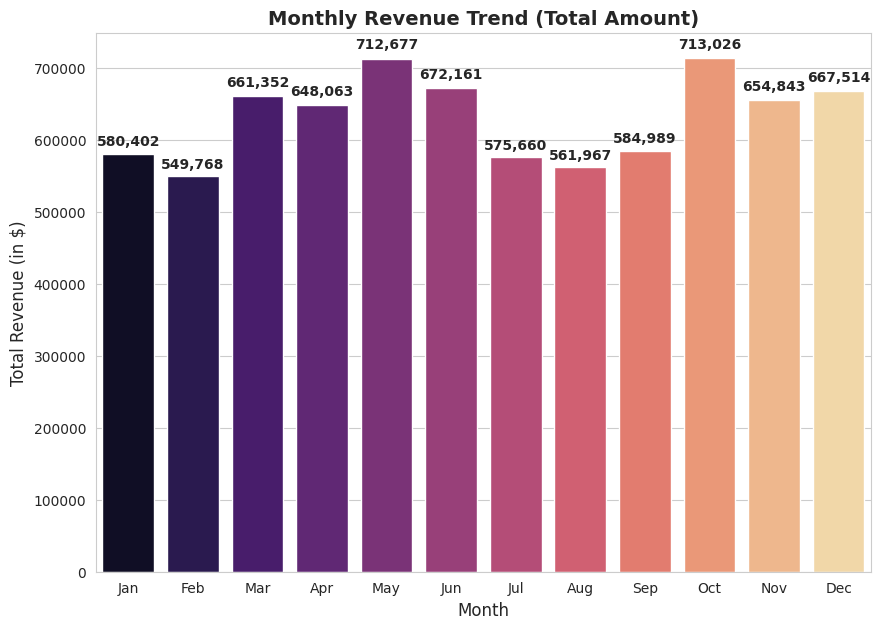

In [135]:
# Group data by month and analyse monthly revenue

# Group by month and then calculate total revenue
Monthly_revenue = filtered_taxi_data.groupby('pickup_month')['total_amount'].sum().sort_index()
print(Monthly_revenue)
# Plotting the revenue trend
plt.figure(figsize=(10, 7))
sns.barplot(x=Monthly_revenue.index, y=Monthly_revenue.values, palette="magma", order=range(1, 13))

# Mentioning labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (in $)", fontsize=12)
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight='bold')

# Format x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(Monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [137]:
# Calculate proportion of each quarter

filtered_taxi_data['quarter'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = filtered_taxi_data.groupby('quarter')['total_amount'].sum()

# Defining Labels and Colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#4C72B0','#55A868','#C44E52','#8172B3'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and showing the pie chart
plt.title("Proportions of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [138]:
# Show how trip fare is affected by distance

# Step 1: Filter out invalid distances
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_distance'] > 0]

# Step 2: Figuring out the correlation
correlation = filtered_df["trip_distance"].corr(filtered_df["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(9, 7))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance",
    y="fare_amount",
    data=filtered_df,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Distance vs Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Correlation between trip_distance and fare_amount: 0.9420


In [139]:
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors

In [142]:
# Step 1: Create Hexbin plot
plt.figure(figsize=(9, 6))

hb = plt.hexbin(
    filtered_df["trip_distance"],
    filtered_df["fare_amount"],
    gridsize=60,  # Increase the size for better visualization
    cmap="plasma",  # More readable colors
    mincnt=1,  # Avoid empty bins
    edgecolors="black",  # Improve the hexagon visibility
  norm=mcolors.LogNorm()  # Log scale for density visibility
)

# Step 2: Adding color bar
cb = plt.colorbar(hb, label="Density of Trips")
cb.set_label("Trip Density (Log Scale)", fontsize=12, fontweight="bold")

# Step 3: Customize the axes and title
plt.xlabel("Trip Distance", fontsize=12, fontweight="bold")
plt.ylabel("Fare Amount", fontsize=12, fontweight="bold")
plt.title("Trip Distance vs Fare Amount", fontsize=14, fontweight="bold")

# Step 4: Limit outliers
plt.xlim(0, filtered_df["trip_distance"].quantile(0.99))
plt.ylim(0, filtered_df["fare_amount"].quantile(0.99))

# Step 5: Add light grid
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.27


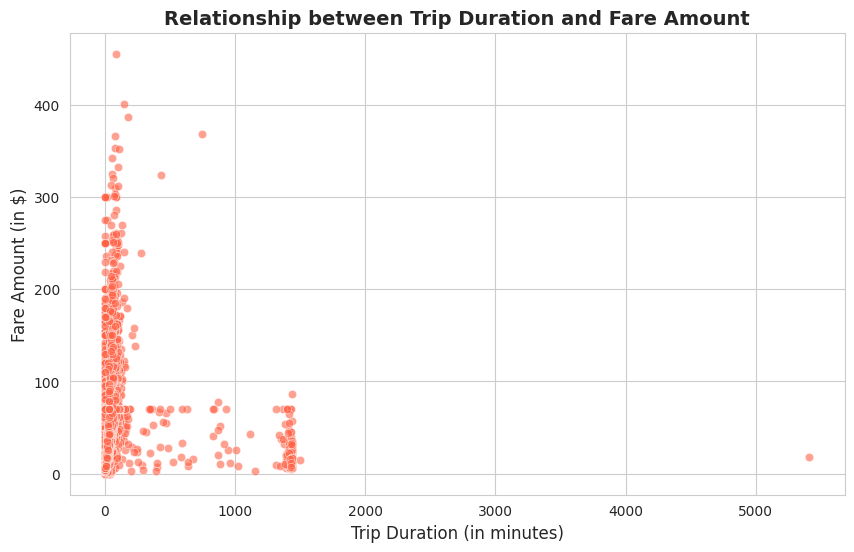

In [144]:
# Show relationship between fare and trip duration

filtered_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_pickup_datetime'])
filtered_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(filtered_taxi_data['tpep_dropoff_datetime'])
filtered_taxi_data['trip_duration'] = (filtered_taxi_data['tpep_dropoff_datetime'] - filtered_taxi_data['tpep_pickup_datetime']).dt.total_seconds() /60 # Convert to minutes

# Filter out rows with zero or negative duration (if any)
filtered_df = filtered_taxi_data[filtered_taxi_data['trip_duration'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = filtered_df['trip_duration'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.2f}")

# Plotting the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['trip_duration'], y=filtered_df['fare_amount'], color='tomato', alpha=0.6)

# Adding labels and title
plt.xlabel("Trip Duration (in minutes)", fontsize=12)
plt.ylabel("Fare Amount (in $)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()


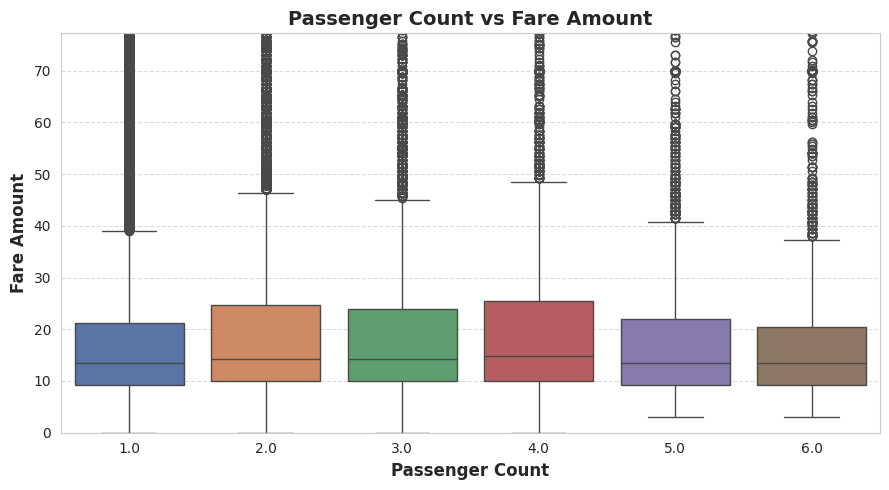

In [148]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(9, 5))

ax = sns.boxplot(
    data=filtered_taxi_data,
    x='passenger_count',
    y='fare_amount',
    palette="deep",
    showfliers=True
)
plt.ylim(0, filtered_taxi_data["fare_amount"].quantile(0.99))

# Adding title and labels
plt.title("Passenger Count vs Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#showing the plot
plt.show()

In [149]:
# Show relationship between tip and trip distance

plt.figure(figsize=(11, 5))
sns.scatterplot(x='trip_distance', y='tip_amount', data=filtered_taxi_data, color='indigo', s=80, alpha=0.7)

# Adding labels and title
plt.xlabel('Trip Distance (in miles)', fontsize=12)
plt.ylabel('Tip Amount (in $)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = filtered_taxi_data['trip_distance'].corr(filtered_taxi_data['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.2f}', fontsize=12, color='black')

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [150]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
filtered_taxi_data['payment_type'] = filtered_taxi_data['payment_type'].map(payment_type_mapping)
payment_counts = filtered_taxi_data['payment_type'].value_counts()
payment_percentage = filtered_taxi_data['payment_type'].value_counts(normalize=True) * 100
payment_counts

payment_type
Credit Card    215082
Cash            44232
Dispute          1876
No Charge        1182
Name: count, dtype: int64

In [151]:
payment_percentage

payment_type
Credit Card    81.975973
Cash           16.858506
Dispute         0.715015
No Charge       0.450505
Name: proportion, dtype: float64

In [152]:
# Count the occurrences of each payment type
payment_type_counts = filtered_taxi_data['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(7, 5))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='pastel')

# Adding labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [153]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [154]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/MyDrive/Datasets_Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [155]:
# print(zones.info())
# zones.plot()

print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

# plotting
zones.plot(
    column="borough",
    cmap="Paired",
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        'loc': 'upper left',
        'bbox_to_anchor': (0, 1),
        'title': 'Boroughs'
    }
)

# Adding title and lables
ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [156]:
# Merge zones and trip records using locationID and PULocationID
merged_zones_taxi_data = filtered_taxi_data.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
merged_zones_taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           4.71         1.0                  N           113           238   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

  payment_type  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0  Credit Card  ...             9        3      20.483333     113.0   
1         Cash  ...             9        3       2.483333     142.0   
2  Credit Card  ...             9        3      44.583333     132.0   
3      Dispute  ...             9        3      38.116667     249.0   
4  Credit Card  ...             9        3       6.300000     144.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.032745    0.000058  Greenwich Village North       113.0  Manhattan   
1    0.038176    0.000076      Lincoln Square East       142.0  Manhattan   
2    0.245479    0.002038              JFK Airport       132.0     Queens   
3    0.036384    0.000072             West Village       249.0  Manhattan   
4    0.027620    0.000047      Little Italy/NoLiTa       144.0  Manhattan   

                                            geometry  
0  POLYGON ((986643.64 204346.324, 986592.535 204...  
1  POLYGON ((989380.305 218980.247, 989359.803 21...  
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
3  POLYGON ((983555.319 204876.901, 983469.158 20...  
4  POLYGON ((985411.76 200369.518, 985342.573 200...  

[5 rows x 31 columns]

In [157]:
merged_zones_taxi_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              6840
pickup_hour                 0
pickup_day                  0
pickup_month                0
quarter                     0
trip_duration               0
OBJECTID                 2639
Shape_Leng               2639
Shape_Area               2639
zone                     2639
LocationID               2639
borough                  2639
geometry                 2639
dtype: int64

In [161]:
merged_zones_taxi_data = merged_zones_taxi_data.dropna(subset=["zone"])

In [162]:
merged_zones_taxi_data.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
Airport_fee              6762
pickup_hour                 0
pickup_day                  0
pickup_month                0
quarter                     0
trip_duration               0
OBJECTID                    0
Shape_Leng                  0
Shape_Area                  0
zone                        0
LocationID                  0
borough                     0
geometry                    0
dtype: int64

In [163]:
merged_zones_taxi_data.shape

(259751, 31)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [164]:
# Group data by location and calculate the number of trips

trips_per_location = merged_zones_taxi_data.groupby("PULocationID").size().reset_index(name="num_of_trips")

# Merge with merged_zones_taxi_data to get zone names
trips_per_location = trips_per_location.merge(
    merged_zones_taxi_data[["PULocationID", "zone"]].drop_duplicates(),
    on="PULocationID",
    how="left"
)

# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_of_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_of_trips']].head(10)

PULocationID                          zone  num_of_trips
115           132                   JFK Airport         13574
211           237         Upper East Side South         12284
143           161                Midtown Center         12176
210           236         Upper East Side North         11016
144           162                  Midtown East          9380
121           138             LaGuardia Airport          8994
164           186  Penn Station/Madison Sq West          8809
204           230     Times Sq/Theatre District          8658
125           142           Lincoln Square East          8537
152           170                   Murray Hill          7714

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [165]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_of_trips"] = zones["num_of_trips"].fillna(0)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_of_trips                   zone_y  
0           1.0          36.0           Newark Airport  
1           NaN           0.0                      NaN  
2           3.0           8.0  Allerton/Pelham Gardens  
3           4.0         292.0            Alphabet City  
4           5.0           1.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

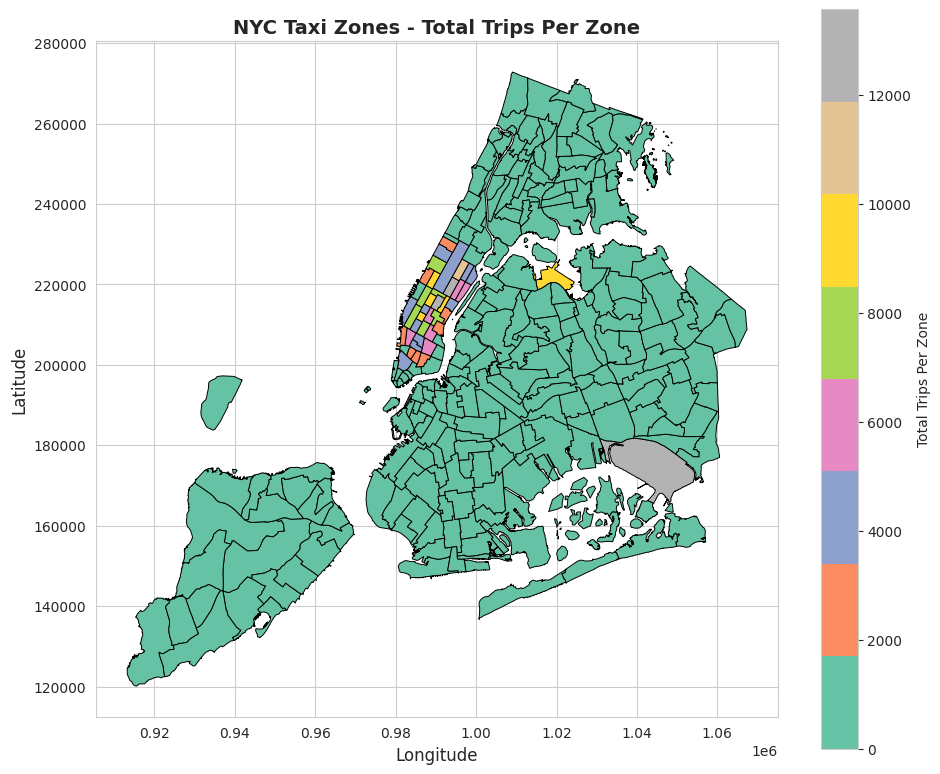

In [166]:
# Define figure and axis
# Plot the map and display it
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(11, 20))

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_of_trips", ascending=False).plot(column="num_of_trips", cmap="Set2", edgecolor="black", linewidth=0.7,
           legend=True, ax=ax,
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()

In [167]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="num_of_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_of_trips"]].head(10)

LocationID    borough                        zone_x  num_of_trips
131         132     Queens                   JFK Airport       13574.0
236         237  Manhattan         Upper East Side South       12284.0
160         161  Manhattan                Midtown Center       12176.0
235         236  Manhattan         Upper East Side North       11016.0
161         162  Manhattan                  Midtown East        9380.0
137         138     Queens             LaGuardia Airport        8994.0
185         186  Manhattan  Penn Station/Madison Sq West        8809.0
229         230  Manhattan     Times Sq/Theatre District        8658.0
141         142  Manhattan           Lincoln Square East        8537.0
169         170  Manhattan                   Murray Hill        7714.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [168]:
# Find routes which have the slowest speeds at different times of the day

# Assume df_filtered contains pickup and dropoff details with timestamps
# Filter out rows where trip duration or speed is negative
merged_zones_taxi_data['trip_duration_hours'] = (merged_zones_taxi_data['tpep_dropoff_datetime'] -
                                             merged_zones_taxi_data['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = merged_zones_taxi_data[(merged_zones_taxi_data["trip_duration_hours"] > 0) & (merged_zones_taxi_data["trip_distance"] > 0)]

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route in hour
    total_distance=("trip_distance", "mean")  # Total distance per route in hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean


PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
16645           113           113           13      7.958796            0.20   
45402           226           145           18     45.165000            1.20   
59016           260           129           17     23.560556            0.96   
43853           209           232           13     23.864722            1.04   
17200           113           235           22      5.820556            0.28   
5365             50            43            8     23.855556            1.42   
38743           164           100           21     11.647222            0.79   
22763           134           265           15      1.354444            0.10   
12174            88           144            0     23.757778            1.78   
45860           229           137            2     23.904167            1.94   

       avg_speed  
16645   0.025129  
45402   0.026569  
59016   0.040746  
43853   0.043579  
17200   0.048105  
5365    0.059525  
38743   0.067827  
22763   0.073830  
12174   0.074923  
45860   0.081157

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

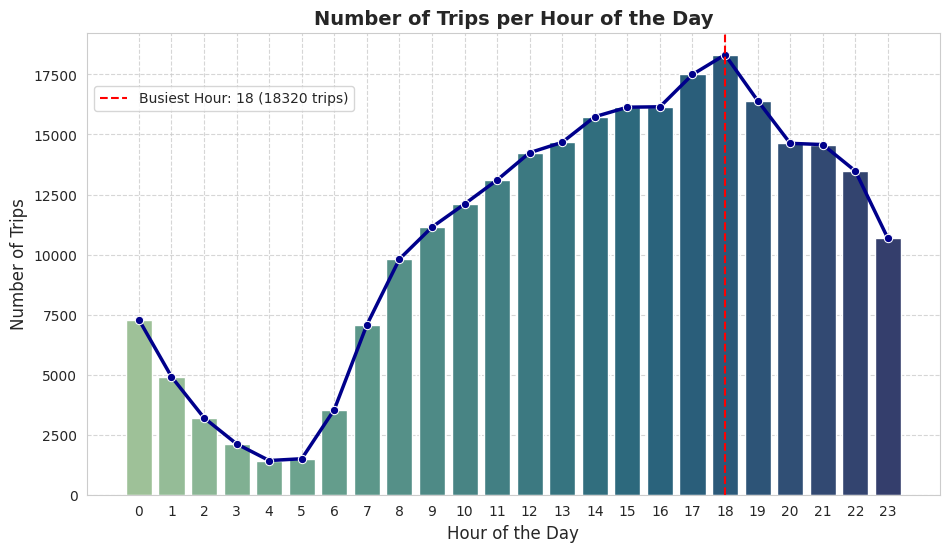

(np.int32(18), 18320)

In [172]:
# Visualise the number of trips per hour and find the busiest hour
# Calculate the number of trips per hour
trips_per_hour = merged_zones_taxi_data.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(11, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='crest')

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

# Return the busiest hour and its trip count
busiest_hour, busiest_hour_trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [173]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers

# Calculate the number of trips per hour
trip_count_per_hour = merged_zones_taxi_data.groupby('pickup_hour').size().reset_index(name='trip_counts')

# Scale up the number of trips using the sampling fraction
sample_fraction = 0.008  # Replace this with your actual sampling fraction
trip_count_per_hour['actual_trip_counts'] = (trip_count_per_hour['trip_counts'] / sample_fraction).astype(int)

# Find the five busiest hours
top_5_hours = trip_count_per_hour.nlargest(5, 'trip_counts')

# Display results
top_5_hours

pickup_hour  trip_counts  actual_trip_counts
18           18        18320             2290000
17           17        17497             2187125
19           19        16410             2051250
16           16        16152             2019000
15           15        16135             2016875

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [174]:
merged_zones_taxi_data.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours']

In [175]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = merged_zones_taxi_data[merged_zones_taxi_data['pickup_day'] <= 4]
weekends = merged_zones_taxi_data[merged_zones_taxi_data['pickup_day'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(11, 6))
sns.set_style("darkgrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hours of the Day")
plt.ylabel("No of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [176]:
# Find top 10 pickup and dropoff zones
# Group by Pickup Hour and PULocationID
pickup_counts = merged_zones_taxi_data.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
merged_zones_taxi_data['dropoff_hour'] = pd.to_datetime(merged_zones_taxi_data['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = merged_zones_taxi_data.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(11, 9))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hours of Day')
ax[0].set_ylabel('No of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hours of Day')
ax[1].set_ylabel('No of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [177]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate total pickups per zone
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios



Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70          1185.0             146              8.116438
132        13574.0            3106              4.370251
138         8994.0            3376              2.664100
186         8809.0            5883              1.497365
43          4440.0            3202              1.386633
249         5862.0            4263              1.375088
114         3438.0            2549              1.348764
162         9380.0            7444              1.260075
161        12176.0           10202              1.193491
100         4245.0            3569              1.189409

In [178]:
print("\nTop 10 Zones with the Lowest Pickup / Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup / Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
8              0.0               4                   0.0
30             0.0               3                   0.0
27             0.0               3                   0.0
58             0.0               9                   0.0
59             0.0               1                   0.0
57             0.0               1                   0.0
120            0.0              12                   0.0
111            0.0               3                   0.0
99             0.0               1                   0.0
206            0.0               6                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [179]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = merged_zones_taxi_data[(merged_zones_taxi_data['pickup_hour'] >= 23) | (merged_zones_taxi_data['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for pick up and dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Displaying results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night


Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
54                   East Village  Manhattan            79          2263
87                    JFK Airport     Queens           132          2030
171                  West Village  Manhattan           249          1832
31                   Clinton East  Manhattan            48          1477
101               Lower East Side  Manhattan           148          1420
155     Times Sq/Theatre District  Manhattan           230          1225
77        Greenwich Village South  Manhattan           114          1214
125  Penn Station/Madison Sq West  Manhattan           186           987
92              LaGuardia Airport     Queens           138           887
113                 Midtown South  Manhattan           164           887

In [180]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
74            East Village  Manhattan            79           1204
44            Clinton East  Manhattan            48           1013
156            Murray Hill  Manhattan           170            893
63            East Chelsea  Manhattan            68            854
97                Gramercy  Manhattan           107            839
129        Lenox Hill West  Manhattan           141            773
241         Yorkville West  Manhattan           263            755
227           West Village  Manhattan           249            682
215  Upper East Side North  Manhattan           236            668
84                Flatiron  Manhattan            90            649

<Figure size 960x720 with 0 Axes>

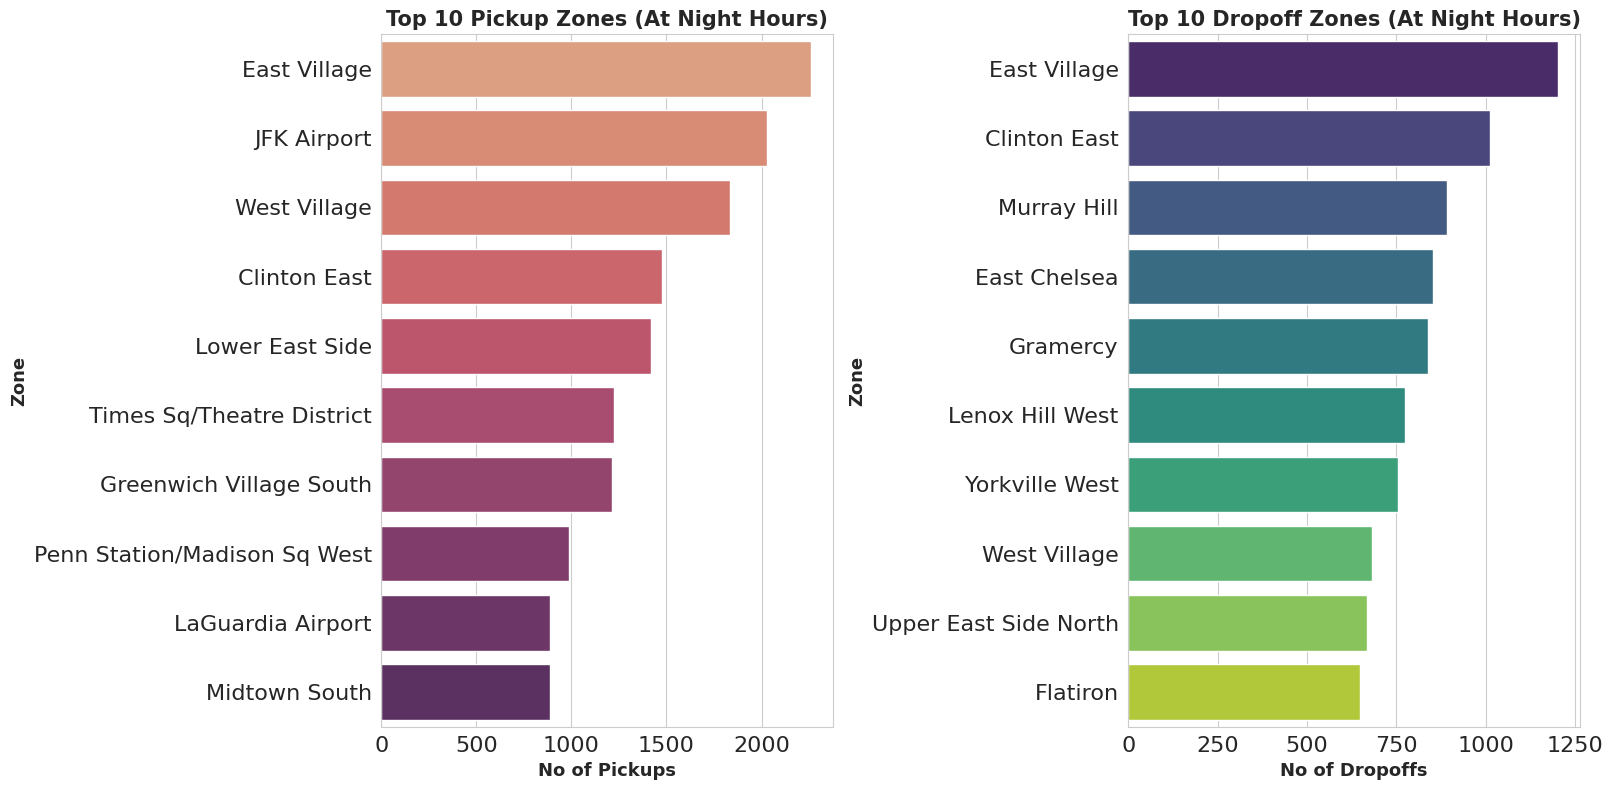

In [183]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 15, 'fontweight': 'bold'}
label_font = {'fontsize': 13, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot for Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="flare")
axes[0].set_title('Top 10 Pickup Zones (At Night Hours)', **title_font)
axes[0].set_xlabel('No of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot for Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis")
axes[1].set_title('Top 10 Dropoff Zones (At Night Hours)', **title_font)
axes[1].set_xlabel('No of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [184]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11 PM to 5 AM
night_hours_df = merged_zones_taxi_data[(merged_zones_taxi_data['pickup_hour'] >= 23) | (merged_zones_taxi_data['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = merged_zones_taxi_data[(merged_zones_taxi_data['pickup_hour'] >= 6) & (merged_zones_taxi_data['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_at_night = night_hours_df['total_amount'].sum()
total_revenue_at_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = merged_zones_taxi_data['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_at_night / total_revenue * 100
day_revenue_share = total_revenue_at_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))

night_revenue_share:- 12.28 day_revenue_share:- 87.72


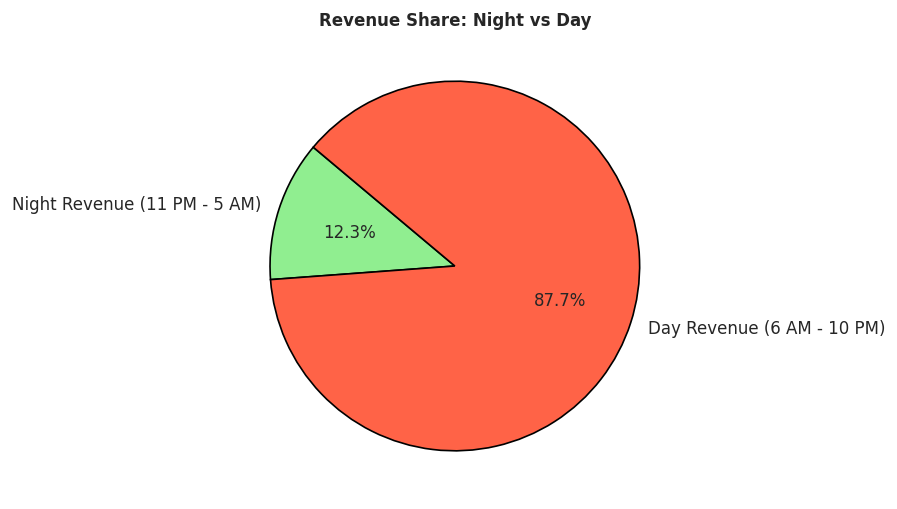

In [185]:
# Labels and values for the pie chart
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#90EE90', '#FF6347']  # light-green for night, tomato-red for day

# Creating a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [188]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out invalid trip distances
merged_zones_taxi_data = merged_zones_taxi_data.loc[merged_zones_taxi_data['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
merged_zones_taxi_data['fare_per_mile'] = merged_zones_taxi_data['fare_amount'] / merged_zones_taxi_data['trip_distance']
merged_zones_taxi_data['fare_per_mile_per_passenger'] = (
    merged_zones_taxi_data['fare_per_mile'] / merged_zones_taxi_data['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = merged_zones_taxi_data.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger,
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    palette='crest'
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
avg_fare_per_mile_per_passenger



passenger_count  fare_per_mile_per_passenger
0              1.0                    10.646294
1              2.0                     6.176058
2              3.0                     4.348509
3              4.0                     4.389665
4              5.0                     1.565163
5              6.0                     1.283705

In [189]:
merged_zones_taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

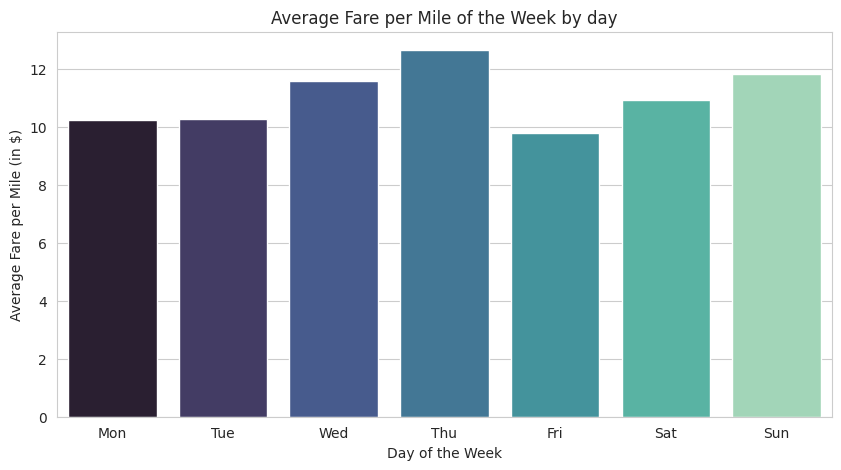

In [192]:
# Compare the average fare per mile for different days and for different times of the day

# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = merged_zones_taxi_data.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = merged_zones_taxi_data.groupby('pickup_day')['fare_per_mile'].mean()

# Plotting the average fare (per mile) of day by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='red')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (in $)")
plt.title("Average Fare per Mile of the Day by hour")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plotting the average fare (per mile) of the week by day
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="mako")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (in $)")
plt.title("Average Fare per Mile of the Week by day")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [193]:
# Compare fare per mile for different vendors

fare_by_vendor_in_hour = merged_zones_taxi_data.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_in_hour,
    marker="o", palette="deep", linewidth=2, ci=95  # Adding confidence interval
)

# Adding labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors of the Day by hour")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dotted gridlines for better readability

plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [194]:
# Defining distance tiers

# Define distance categories of distance
def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
merged_zones_taxi_data["distance_tier"] = merged_zones_taxi_data["trip_distance"].apply(categorize_distance)

# Ensure that correct categorical order is applied
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
merged_zones_taxi_data["distance_tier"] = pd.Categorical(merged_zones_taxi_data["distance_tier"], categories=distance_order, ordered=True)

# Group by VendorID & Distance Tier
fare_by_vendor_tier = merged_zones_taxi_data.groupby(["VendorID", "distance_tier"], as_index=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set2", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [195]:
#  Analyze the tip percentages based on distances, passenger counts and pickup times
merged_zones_taxi_data['tip_percentage'] = (merged_zones_taxi_data['tip_amount'] / merged_zones_taxi_data['fare_amount']) * 100

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [196]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate the average tip percentage by distance category
avg_tip_by_distance = merged_zones_taxi_data.groupby('distance_tier')['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(7, 5))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="pastel", width = .4)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip in (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()


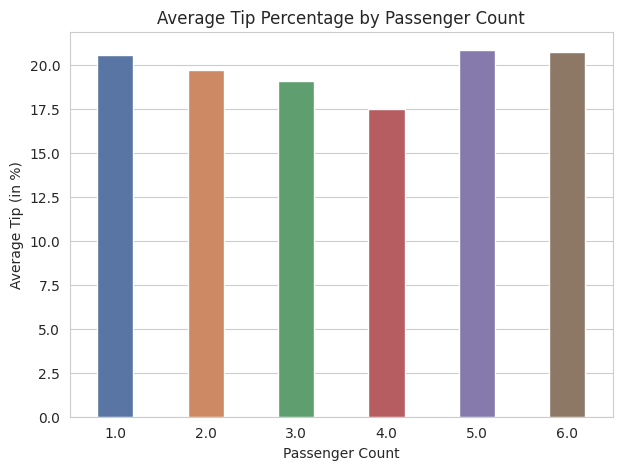

In [197]:
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = merged_zones_taxi_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plotting the average tip percentage by passenger count
plt.figure(figsize=(7, 5))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="deep", width = .4)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip (in %)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()

In [198]:
# Calculate the average tip percentage by hour of pickup
avg_tip_by_hour = merged_zones_taxi_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by hour of the day
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="blue", linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip (in %)')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

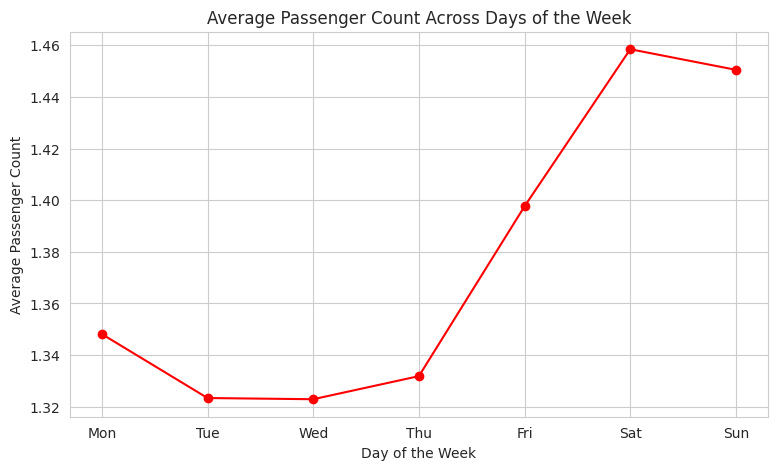

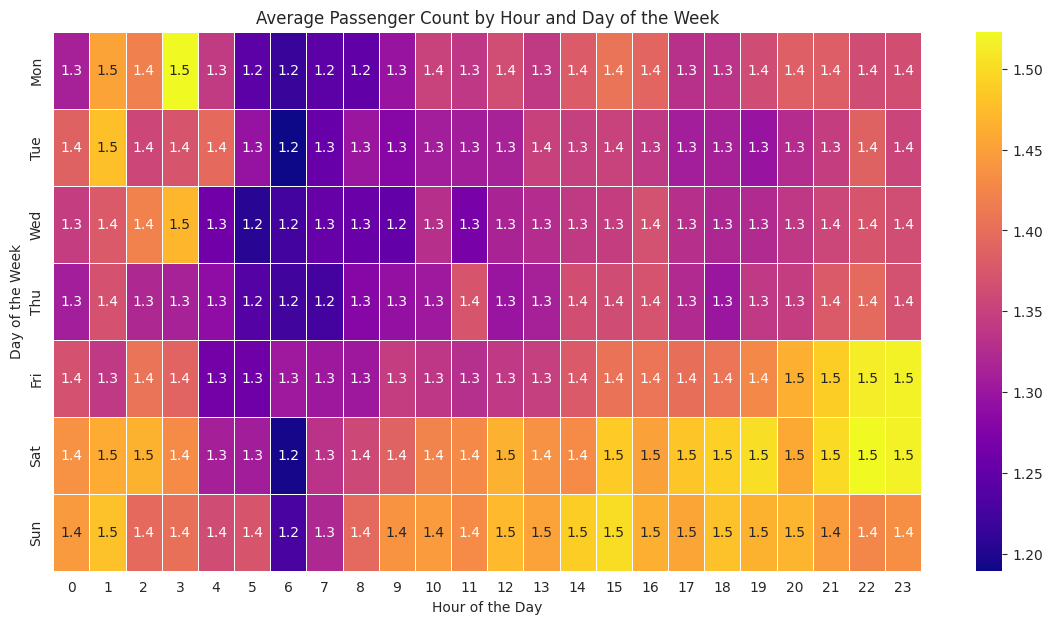

In [200]:
# See how passenger count varies across hours and days

# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = merged_zones_taxi_data.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = merged_zones_taxi_data.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = merged_zones_taxi_data.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plotting the variation of passenger count across hours of the day
plt.figure(figsize=(9, 5))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='g')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plotting the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(9, 5))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='r')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week(0-6)
plt.grid(True)
plt.show()

# Plotting Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(14, 7))
sns.heatmap(passenger_heatmap, cmap="plasma", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

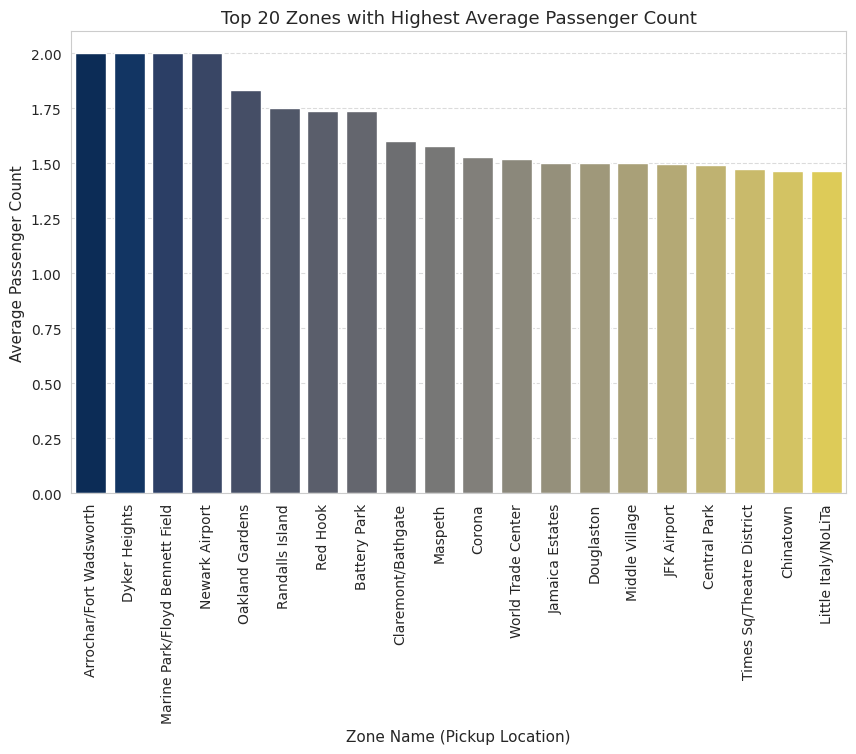

In [201]:
# How does passenger count vary across zones

# Group by 'zone' and calculate average passenger count
avg_passenger_by_zone = merged_zones_taxi_data.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(10, 6))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="cividis")

# Adding title and labels
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=13)
plt.xlabel("Zone Name (Pickup Location)", fontsize=11)
plt.ylabel("Average Passenger Count", fontsize=11)
plt.xticks(rotation=90)  # Rotate x-axis labels to read
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


In [202]:
merged_zones_taxi_data.columns.to_list()  #checking the list of columns present in merged_zones_taxi_data

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month',
 'quarter',
 'trip_duration',
 'OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry',
 'trip_duration_hours',
 'dropoff_hour',
 'fare_per_mile',
 'fare_per_mile_per_passenger',
 'distance_tier',
 'tip_percentage']

In [207]:
# Dropping off duplicate columns
merged_zones_taxi_data = merged_zones_taxi_data.drop(columns=['LocationID_dropoff', 'zone_dropoff'], errors='ignore')

# Checking that the columns are removed
print(merged_zones_taxi_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'trip_duration_hours', 'dropoff_hour', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_tier', 'tip_percentage'],
      dtype='object')


In [208]:
merged_zones_taxi_data.shape

(257915, 37)

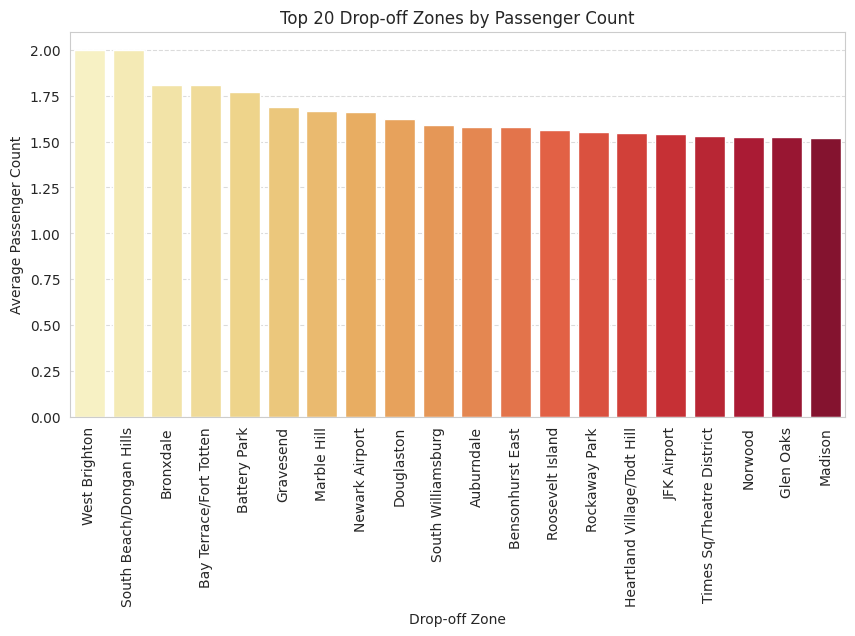

In [216]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Creating a mapping of LocationID according to  Zone Name
location_accto_zone = merged_zones_taxi_data[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
merged_zones_taxi_data = merged_zones_taxi_data.merge(location_accto_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = merged_zones_taxi_data.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sorting in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plotting top 20 drop-off zones
plt.figure(figsize=(10, 5))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="YlOrRd")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

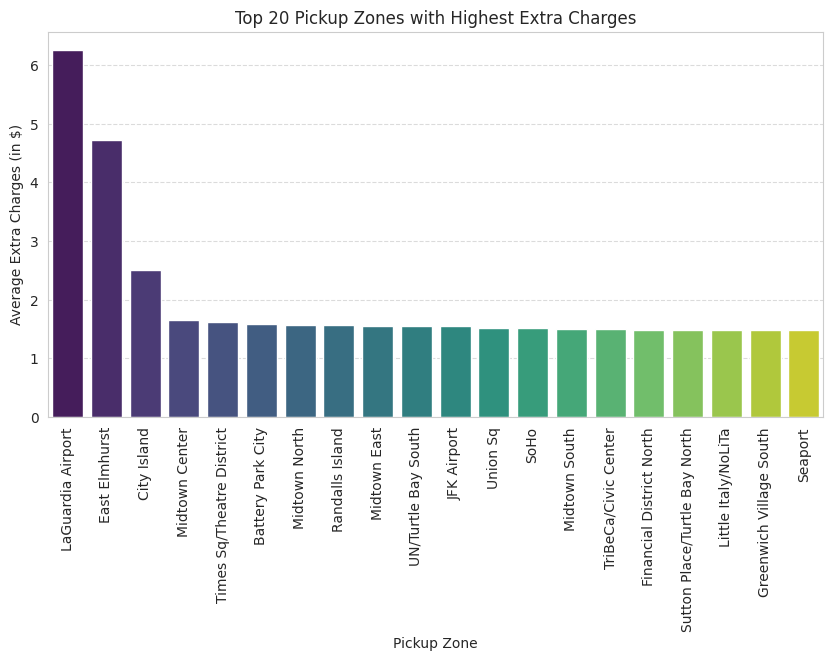

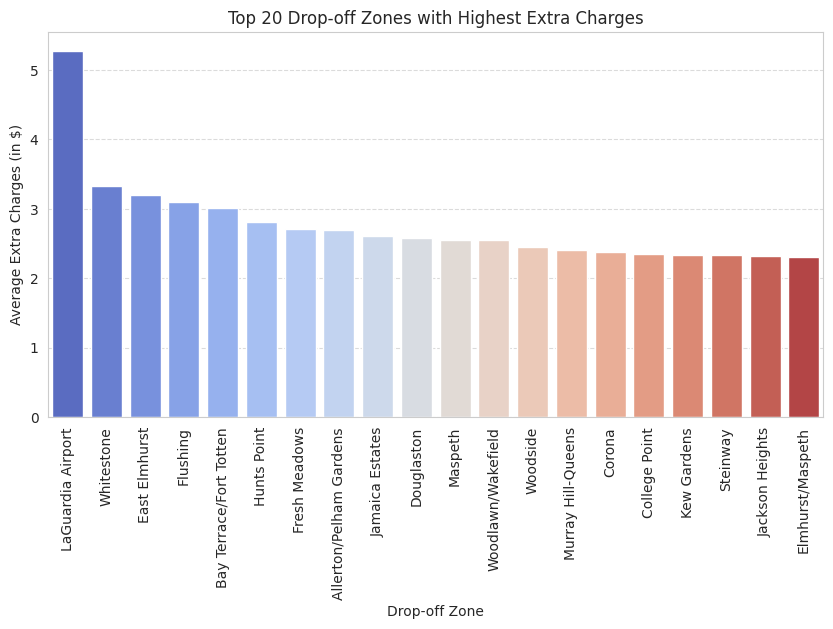

In [217]:
# How often is each surcharge applied?

# Calculate total extra charges per pickup zone
extra_by_pickup = merged_zones_taxi_data.groupby("zone")["extra"].mean().reset_index()

# Sorting in descending order
sorted_extra_by_pickup = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plotting top 20 zones with highest extra charges
plt.figure(figsize=(10, 5))
sns.barplot(x="zone", y="extra", data=sorted_extra_by_pickup.head(20), palette="viridis")
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges (in $)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeating for drop-off zones
extra_by_dropoff = merged_zones_taxi_data.groupby("zone_dropoff")["extra"].mean().reset_index()
sorted_extra_by_dropoff = extra_by_dropoff.sort_values(by="extra", ascending=False)   # Sorting in descending order

plt.figure(figsize=(10, 5))
sns.barplot(x="zone_dropoff", y="extra", data=sorted_extra_by_dropoff.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges (in $)")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


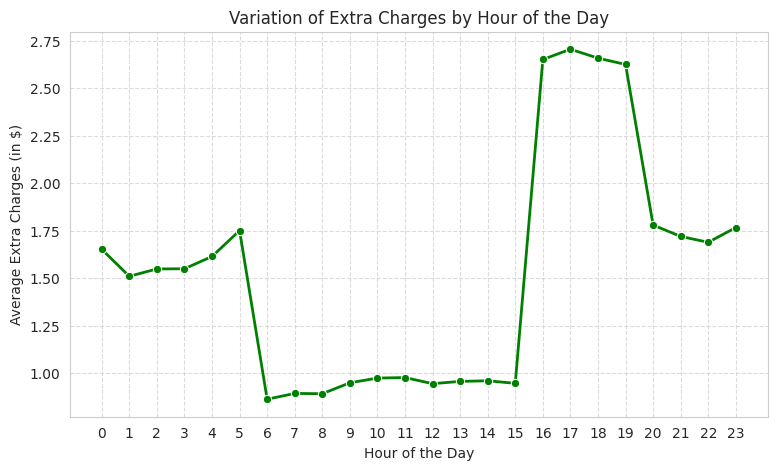

In [218]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = merged_zones_taxi_data.groupby("pickup_hour")["extra"].mean().reset_index()

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="g", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges (in $)")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

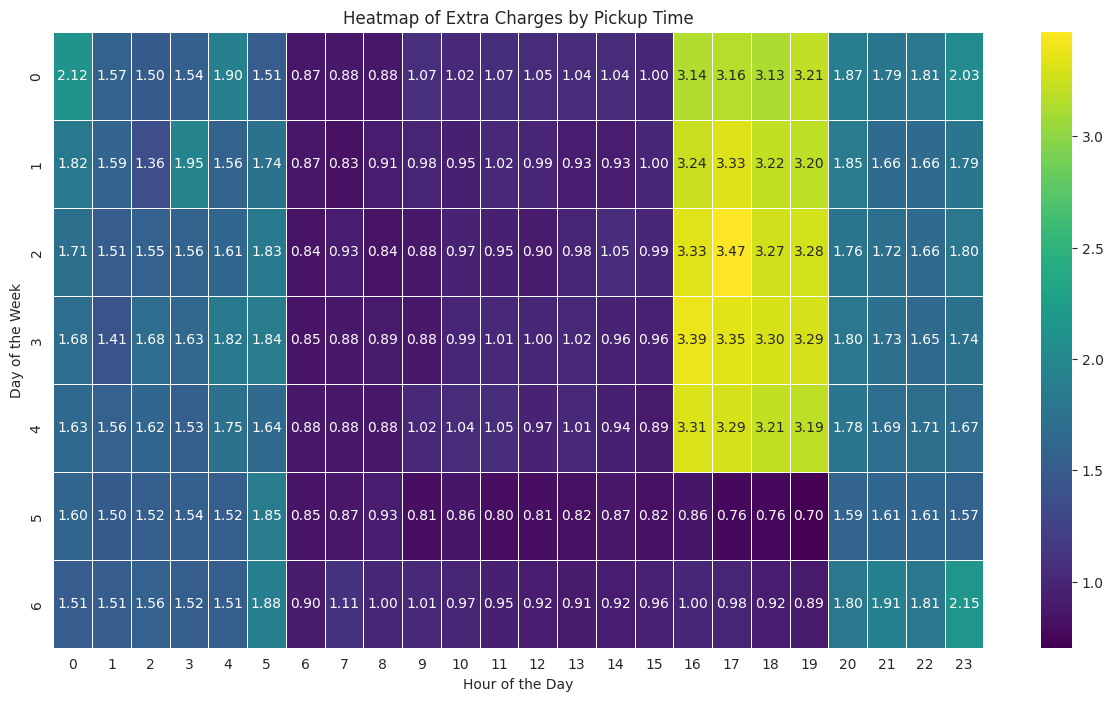

In [219]:
# Group by pickup day and hour to calculate average extra charges
extra_heatmap_data = merged_zones_taxi_data.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()

# Creating heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(extra_heatmap_data, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## Recommendations to Improve Taxi Routing and Dispatching

1.Utilize historical ride data to strategically position taxis in high-demand zones such as Midtown Manhattan, Wall Street, and Times Square, particularly during office hours.

2.Minimize unoccupied return trips from outer boroughs (e.g., Bronx, Staten Island) by implementing shared ride pooling and optimizing backhaul routes.

3.Integrate public event schedules (e.g., concerts, parades, sports games) to anticipate surges in demand and proactively allocate taxi resources in nearby areas.

4.Leverage real-time traffic data to dynamically reroute taxis, helping to avoid congestion hotspots and ensure more efficient travel during peak hours.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## Strategic Allocation of Cabs Across Different Zones

1.Increase the concentration of taxis in high-demand areas such as Midtown and Lower Manhattan during daytime business hours, then gradually reallocate supply to residential and leisure zones like the Upper East/West Side and Brooklyn in the evening.

2.Maintain a dedicated pool of taxis near JFK and LaGuardia airports, using predictive models based on incoming flight volumes to reduce passenger wait times and improve service efficiency.

3.During late-night and early-morning hours, reposition taxis to active nightlife and entertainment areas—particularly in Brooklyn—where limited availability often leads to missed passenger opportunities.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## Fare Strategy Recommendations

1.Introduce tiered fare structures during peak periods (e.g., morning and evening rush hours) and for high-demand routes such as airport transfers, reflecting increased wait times and service value.

2.Encourage usage during low-demand hours or from underutilized areas by offering discounts or fixed fare options to increase fleet efficiency and coverage.

3.Establish a minimum fare threshold to protect revenue from ultra-short trips, particularly those under 1 kilometer in distance.

4.Continuously monitor and compare fare structures with competitors such as Uber and Lyft to ensure pricing remains transparent and market-relevant.